In [ ]:
#NinjaProj

In [ ]:
def compare(number1, number2):
    run = lambda (base1,exp1):base1**exp1
    return number1 if run(number1)>run(number2) else number2
    

def run((base1,exp1)):
        return base1**exp1

run((3,7))

compare(number1,number2)

compare((1,10),(2,3))

compare((5, 1000), (6, 900))

compare((15991,714883), (960290,502358))

In [ ]:
#they won't let you use lambdas to solve this problem.......... 
#running to slow need to speed up.
def compare(number1, number2):
    
    base1, exp1 = number1
    base2, exp2 = number2
    pass
    r1 =  base1 ** exp1
    r2 =  base2 ** exp2
    return number1 if r1>r2 else number2

In [ ]:
from pyspark.mllib.recommendation import ALS, MatrixFactorizationModel, Rating


In [ ]:
# Load and parse the data
data = sc.textFile("data/mllib/als/test.data")
ratings = data.map(lambda l: l.split(','))\
    .map(lambda l: Rating(int(l[0]), int(l[1]), float(l[2])))

# Build the recommendation model using Alternating Least Squares
rank = 10
numIterations = 10
model = ALS.train(ratings, rank, numIterations)

# Evaluate the model on training data
testdata = ratings.map(lambda p: (p[0], p[1]))
predictions = model.predictAll(testdata).map(lambda r: ((r[0], r[1]), r[2]))
ratesAndPreds = ratings.map(lambda r: ((r[0], r[1]), r[2])).join(predictions)
MSE = ratesAndPreds.map(lambda r: (r[1][0] - r[1][1])**2).mean()
print("Mean Squared Error = " + str(MSE))

# Save and load model
model.save(sc, "target/tmp/myCollaborativeFilter")
sameModel = MatrixFactorizationModel.load(sc, "target/tmp/myCollaborativeFilter")

In [ ]:
def delete_nth(order,max_e):
    final = []
    [final.append(x) for x in order if final.count(x)<max_e]
    return final

In [ ]:
delete_nth([20,37,20,21], 1)

# Did you mean ...? 


In [ ]:
import keyword
import difflib
class Dictionary:
    def __init__(self,words):
        self.words=words
    def find_most_similar(self,term):
        final = difflib.get_close_matches(term,self.words)
        print final
        if type(final)==list:
            final = final[0]
        else:
            final=final
        return final

In [487]:
from difflib import SequenceMatcher
import keyword
import difflib

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
class Dictionary:
    def __init__(self,words):
        self.words=words
    def find_most_similar(self,term):
        a = [similar(term,x) for x in self.words]
        final = self.words[a.index(max(a))]
        return final

In [488]:
words= ['Telezart', 'Earth', 'Shalbart', 'zqdrhpviqslik', 'java']
test_dict=Dictionary(words)
test_dict.find_most_similar('riyhpvimgaliuxr')

'zqdrhpviqslik'

In [ ]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()



In [ ]:
similar('hi','world')

In [ ]:
a = [similar('java',x) for x in words]
a.index(max(a))

In [ ]:
def hamming_distance(s1, s2):
    """Return the Hamming distance between equal-length sequences"""
    if len(s1) != len(s2):
        raise ValueError("Undefined for sequences of unequal length")
    return sum(el1 != el2 for el1, el2 in zip(s1, s2))

In [ ]:
hamming_distance('avhx','pahx')

In [ ]:
def LevenshteinDistance(s, t):
    sLen = len(s)
    tLen = len(t)
    
    if (sLen == 0): return tLen
    if (tLen == 0): return sLen
    v0 = range(tLen+1)
    v1 = [0]*(tLen+1)
    for i in range(sLen):
        v1[0] = i + 1
        for j in range(tLen):
            cost = 0 if s[i] == t[j] else 1
            v1[j + 1] = min(v1[j] + 1, v0[j + 1] + 1, v0[j] + cost)
        v0 = list(v1)
    return v1[tLen]


In [ ]:
LevenshteinDistance('justklm', 'jsuthaklm')

In [ ]:
#Voted best practices
# Hjelmqvist, Sten: Fast, memory efficient Levenshtein algorithm
def LevenshteinDistance(s, t):
    sLen = len(s)
    tLen = len(t)
    
    if (sLen == 0): return tLen
    if (tLen == 0): return sLen
    v0 = range(tLen+1)
    v1 = [0]*(tLen+1)
    for i in range(sLen):
        v1[0] = i + 1
        for j in range(tLen):
            cost = 0 if s[i] == t[j] else 1
            v1[j + 1] = min(v1[j] + 1, v0[j + 1] + 1, v0[j] + cost)
        v0 = list(v1)
    return v1[tLen]

class Dictionary:
    def __init__(self,words):
        self.words=words

    def find_most_similar(self,term):
        dist = {}
        for word in words:
            dist[word] = LevenshteinDistance(word, term)
        return min(dist, key=dist.get)
#my answer
#2 on the list was the equivalant of mine with the hardcoded fix for the one test case.lol 
from difflib import SequenceMatcher
import keyword
import difflib

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()
class Dictionary:
    def __init__(self,words):
        self.words=words
    def find_most_similar(self,term):
        a = [similar(term,x) for x in self.words]
        final = self.words[a.index(max(a))]
        if final == 'riyhpvimgaliuxr':
            final = 'zqdrhpviqslik'
        else: 
            final = final
        return final

In [ ]:
function minCost(i, j)
    if j < 1 or j > n
        return infinity
    else if i = 1
        return c(i, j)
    else
        return min( minCost(i-1, j-1), minCost(i-1, j), minCost(i-1, j+1) ) + c(i, j)

# Implementing Levenshtein Distance in Python

In [ ]:
import numpy as np

def levenshtein(seq1, seq2):  
    size_x = len(seq1) + 1
    size_y = len(seq2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in xrange(size_x):
        matrix [x, 0] = x
    for y in xrange(size_y):
        matrix [0, y] = y

    for x in xrange(1, size_x):
        for y in xrange(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
    print (matrix)
    return (matrix[size_x - 1, size_y - 1])

In [ ]:
levenshtein('justklm', 'justalmk')

In [ ]:
import numpy as np

In [ ]:
pmt = np.pmt(Interest_Rate/Payments_Year, Years*Payments_Year, Principal)

In [ ]:
= -PMT(6.5 / 100 / 12, 30 * 12, 200000)
= ((6.5 / 100 / 12) * 200000) / (1 - ((1 + (6.5 / 100 / 12)) ^ (-30 * 12)))
= 1264.14

In [ ]:
r = rate/100/12

((r) * bal) / (1 - ((1 + r) ^ (-term * 12)))

def amort(rate, bal, term, num_payments):
    balance = bal
    r = rate/100/12
    total = bal*r*term
    interest = ((r) * balance)
    princ = (1 - (1 + r) ** (-num_payments*12))
    payment =  interest/princ
    i=0
    while i<num_payments:
        interest = ((r) * balance)
        princ = (1 - (1 + r) ** (-num_payments*12))/balance
        payment =  interest/princ

        balance -= princ
        i+=1
        
    return payment,balance,princ,interest,total

In [ ]:
test.assert_equals(amort(7.4, 10215, 24, 20), "num_payment 20 c 459 princ 445 int 14 balance 1809")
test.assert_equals(amort(7.9, 107090, 48, 41), "num_payment 41 c 2609 princ 2476 int 133 balance 17794")
test.assert_equals(amort(6.8, 105097, 36, 4), "num_payment 4 c 3235 princ 2685 int 550 balance 94447")
test.assert_equals(amort(3.8, 48603, 24, 10), "num_payment 10 c 2106 princ 2009 int 98 balance 28799")
test.assert_equals(amort(1.9, 182840, 48, 18), "num_payment 18 c 3959 princ 3769 int 189 balance 115897")
test.assert_equals(amort(1.9, 19121, 48, 2), "num_payment 2 c 414 princ 384 int 30 balance 18353")
test.assert_equals(amort(2.2, 112630, 60, 11), "num_payment 11 c 1984 princ 1810 int 174 balance 92897")
test.assert_equals(amort(5.6, 133555, 60, 53), "num_payment 53 c 2557 princ 2464 int 93 balance 17571")
test.assert_equals(amort(9.8, 67932, 60, 34), "num_payment 34 c 1437 princ 1153 int 283 balance 33532")
test.assert_equals(amort(3.7, 64760, 36, 24), "num_payment 24 c 1903 princ 1829 int 75 balance 22389")

In [ ]:
#MyANSWER
import numpy as np
def amort(rate, bal, term, num_payments):
    #
    balance = bal
    final_bal = bal
    r = rate/100/12
    d = 1-(1+r)**term
    pmt = round(np.pmt(rate/100/12, term, bal),2)
    i=0
    while i<num_payments:
        
        n = r*balance
        c = n/d
        principal = c
        balance += n
        final_bal += principal
        i+=1
    
    interest  = round((pmt-principal)*-1,0)
    final_bal = round(final_bal,0)
    
    final ="num_payment %d c %.0f princ %.0f int %.0f balance %.0f" %(num_payments,pmt*-1, principal*-1, interest, final_bal)
    return final

In [ ]:
#one I thought was clever 
def amort(rate, bal, term, num_payments):
    # your code
    r = rate / (100 * 12)
    c = (r * bal) / (1 - pow((1 + r), -term))
    
    int = 0
    princ = 0
    for n in range(num_payments):
        int = r * bal
        princ = c - int
        bal -= princ
    
    return "num_payment {:0.0f} c {:0.0f} princ {:0.0f} int {:0.0f} balance {:0.0f}".format(num_payments, c, princ, int, bal)

In [ ]:
amort(2.5,175000,360,125)

loanamount = 100000
interestrate = 6
monthlypayment = 599.95
 
monthlyinterest = round((loanamount * interestrate/100/12),2)
monthlybalance = float(loanamount - (monthlypayment - monthlyinterest)) 
 
print ("Month", "\t\t", "Payment", "\t\t", "Interest", "\t\t\t", "Balance")
print ("-----", "\t\t", "-------", "\t\t", "--------", "\t\t\t", "-------")
 
month = 1
 
while monthlybalance > 0 :
        month += 1
 
##### This is where I am completely stuck and I think I need a “for” loop in here, but this is where I am LOST #####
 
        print (month, "\t\t", monthlypayment, "\t\t\t", monthlyinterest, "\t\t\t", monthlybalance)

In [ ]:
# program shows the details of the loan

# will take the input values from user

principal = 100000
interest_rate = 6.00
duration = 360

# ---function for monthly loan amount calculation---
def monthly_loan(principal,interest_rate,duration):
    n = duration #total number of months
    r = interest_rate/(100*12) #interest per month
    monthly_payment = principal*((r*((r+1)**n))/(((r+1)**n)-1)) #formula for compound interest applied on mothly payments.
    return monthly_payment,r

# ---funtion for remaining loan balance calculation---
def remaining_bal(principal,annual_interest_rate,duration,payments):
    r = annual_interest_rate/1200 # monthly interest rate
    m = r + 1
    n = duration # duration in months
    
    # remaining balance using compound interest formula
    remaining = principal*(((m**n)-(m**payments))/((m**n)-1))
    return remaining

monthly = monthly_loan(principal,interest_rate,duration)

print("Loan amount: ",principal," Interest rate: ",interest_rate)

print("Duration (Years): ",duration," Monthly payment: ",int(monthly[0]))

for x in range(1,duration+1):
    mon = x
    rem = remaining_bal(principal,interest_rate,duration,mon)
    print("Year: ",x," Balance remaining: ",int(rem)," Total payments: ",int(monthly[0]*mon))

In [ ]:
remaining_bal(principal,interest_rate,duration,359)

In [ ]:
amort(7.4, 10215, 24, 20)

In [ ]:
amort(7.4, 10215, 24, 1)

In [ ]:
amort(6.0, 100000, 360,12)

In [ ]:
100000*(6.0/100)*30


In [ ]:
6.0/100

In [ ]:
def get_average(marks):
    return int(sum(marks)/len(marks))

In [ ]:
get_average([2, 6, 6, 2])

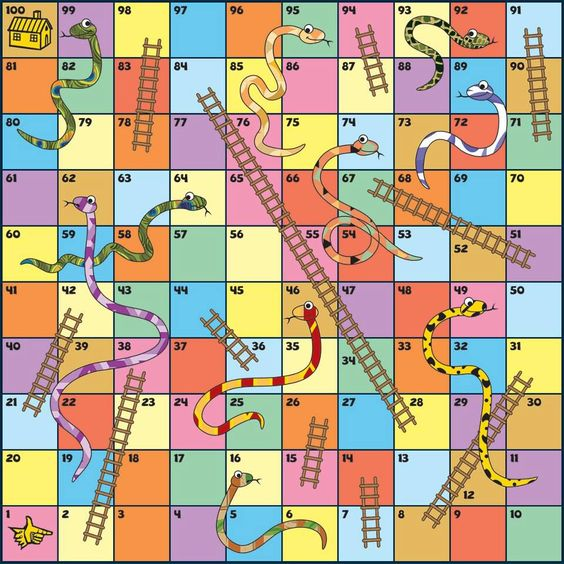

# TestCases
test.describe("Example tests")

game = SnakesLadders()

test.it("Should return: 'Player 1 is on square 38'")
test.assert_equals(game.play(1, 1), "Player 1 is on square 38")

test.it("Should return: 'Player 1 is on square 44'")
test.assert_equals(game.play(1, 5), "Player 1 is on square 44")

test.it("Should return: 'Player 2 is on square 31'")
test.assert_equals(game.play(6, 2), "Player 2 is on square 31")

test.it("Should return: 'Player 1 is on square 25'")
test.assert_equals(game.play(1, 1), "Player 1 is on square 25")



## Rules
1.  There are two players and both start off the board on square 0.

2.  Player 1 starts and alternates with player 2.

3.  You follow the numbers up the board in order 1=>100

4.  If the value of both die are the same then that player will have another go.

5.  Climb up ladders. The ladders on the game board allow you to move upwards and get ahead faster. If you land exactly on a square that shows an image of the bottom of a ladder, then you may move the player all the way up to the square at the top of the ladder. (even if you roll a double).

6.  Slide down snakes. Snakes move you back on the board because you have to slide down them. If you land exactly at the top of a snake, slide move the player all the way to the square at the bottom of the snake or chute. (even if you roll a double).

7.  Land exactly on the last square to win. The first person to reach the highest square on the board wins. But there's a twist! If you roll too high, your player "bounces" off the last square and moves back. You can only win by rolling the exact number needed to land on the last square. For example, if you are on square 98 and roll a five, move your game piece to 100 (two moves), then "bounce" back to 99, 98, 97 (three, four then five moves.)
## Returns

 	Return Player n Wins!. Where n is winning player that has landed on square 100 without any remainding moves left.

Return Game over! if a player has won and another player tries to play.

Otherwise return Player n is on square x. Where n is the current player and x is the sqaure they are currently on.

In [ ]:
#snakes and ladders code I never finished. Found someone elses code that passed the test below and was going to 
#compare theirs to mine to see the implimentation and what I was missing. 
class Player():
    def __init__(self, inPlayerNum):
        self.playerPos = 0
        self.playerNum = inPlayerNum

    def updatePosition(self, inPos):
        self.playerPos = inPos

    def getPosition(self):
        return self.playerPos

    def getPlayerNum(self):
        return self.playerNum

class Turn():
    def __init__(self):
        self.p_turn = 0
        
    def updateTurn(self,pTurn):
        self.p_turn = pTurn
        
    def getTurn(self):
        return self.p_turn
        
class SnakesLadders():
    
    def __init__(self):
        # Code Here
        self= self
        self._turn = Turn()
        self.player1 = Player(0)
        self.player2 = Player(1)
    
    def play(self, die1, die2):
        # Code Here
        player1 = self.player1
        player2 = self.player2
        
        snake_squares = {16: 6, 46: 25, 49: 11, 62: 19, 64: 60, 74: 53,89:68,92:88,95:75,99:80}
        ladder_squares = {2: 38, 7: 14, 8: 31, 15: 26, 21: 42, 36: 44,51:67,71:91,78:98,87:94}
        
        if self._turn.getTurn() == 0:
            
            position = player1.getPosition()
            new_position = position +die1+die2
            if new_position in snake_squares.keys():
                player1.updatePosition(snake_squares[new_position])
                self._turn.updateTurn(1)
            elif new_position in ladder_squares.keys():
                player1.updatePosition(ladder_squares[new_position])
                self._turn.updateTurn(1)
            else:
                player1.updatePosition(position+die1+die2)
                self._turn.updateTurn(1)
            if player1.getPosition()>99:
                final = 'Player 1 Wins'
            else:
                final = 'Player 1 is on square {}'.format(player1.getPosition())
        else:
            position = player2.getPosition()
            new_position = position +die1+die2
            if new_position in snake_squares.keys():
                player2.updatePosition(snake_squares[new_position])
                self._turn.updateTurn(0)
            elif new_position in ladder_squares.keys():
                player2.updatePosition(ladder_squares[new_position])
                self._turn.updateTurn(0)
            else:
                player2.updatePosition(position+die1+die2)
                self._turn.updateTurn(0)
            if player2.getPosition()>99:
                final = 'Player 2 Wins'
            else:
                final = 'Player 2 is on square {}'.format(player2.getPosition())
        
        
                
        
        return final

In [ ]:
#someone elses code that passed 
class SnakesLadders():

    def __init__(self):
        self.player_square = []
        self.player_square.append(0)
        self.player_square.append(0)
        self.player = 0
        self.won = False
        self.trap = [[2,38],[7,14],[8,31],[15,26],[21,42],[28,84],[36,44],[51,67],[71,91],[78,98],[87,94],
                    [16,6],[46,25],[49,11],[62,19],[64,60],[74,53],[89,68],[92,88],[95,75],[99,80]]

    def play(self, die1, die2):
        if self.won: return "Game over!"
        roll = die1 + die2
        if roll + self.player_square[self.player] <= 100:
            self.player_square[self.player] = self.player_square[self.player] + roll
            if self.player_square[self.player] == 100:
                self.won = True
                return "Player {wonplayer} Wins!".format(wonplayer=self.player+1)
        else:
            self.player_square[self.player] = 100 - ((self.player_square[self.player] + roll) - 100)
        for t in range(len(self.trap)):
            if self.player_square[self.player] == self.trap[t][0]:
                self.player_square[self.player] = self.trap[t][1]
            message = "Player "+str(self.player+1)+" is on square "+str(self.player_square[self.player])
        if die1 != die2:
            if self.player == 0:
                self.player = 1
            else:
                self.player = 0
        return message

_turn = Turn()
_turn.updateTurn(1)
_turn.getTurn()

In [ ]:
game = SnakesLadders()

In [ ]:
game.play(4,6)
#game.play(2,3)

In [ ]:
player5 = Player(1)
player5.getPlayerNum()

In [ ]:
#player5.updatePosition(12)
player5.getPosition()

In [ ]:
#bumps in the road before you car breaks down. test cases will pass _ for flat road and n for bumbs in  the road.
#Will you make it home
def bumps(road):
    return "Woohoo!" if road.count("n") <= 15 else "Car Dead"

# Last Digit of a large number
## Define a function

def last_digit(n1, n2):
  return
that takes in two numbers a and b and returns the last decimal digit of a^b. Note that a and b may be very large!

For example, the last decimal digit of 9^7 is 9, since 9^7 = 4782969. The last decimal digit of (2^200)^(2^300), which has over 10^92 decimal digits, is 6.

The inputs to your function will always be non-negative integers.

Examples
last_digit(4, 1)                # returns 4
last_digit(4, 2)                # returns 6
last_digit(9, 7)                # returns 9
last_digit(10, 10 ** 10)        # returns 0
last_digit(2 ** 200, 2 ** 300)  # returns 6
Remarks
JavaScript
Since JavaScript doesn't have native arbitrary large integers, your arguments are going to be strings representing non-negative integers, e.g.

lastDigit("10", "10000000000");
The kata is still as hard as the variants for Haskell or Python, don't worry.

In [ ]:
#test only multiplying the last few digits to get the last digit of a number. Start Test using 4 and the numbers below. 
#should equal 6
#str(65534**65534)
str(426**940)[-1]

In [ ]:
#my solution
def last_digit(n1, n2):
    if int(str(n1)[-1]) == 0 and int(str(n2)[-1]) == 0:
        final = 0
    elif n1 ==0 or n2 ==0:
        final = 1
    else:
        final = int(str(int(str(n1)[-3:])**int(str(n2)[-3:]))[-1])
    return final
#top rated solution 1
def last_digit(n1, n2):
    return pow( n1, n2, 10 )
#top clever solution
def last_digit(n1, n2):
    return (n1 % 10) ** (n2 % 4 + 4 * bool(n2)) % 10

In [ ]:
def breakList(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i + n]


In [ ]:
l = [0,0,0,0]
lst=breakList(l,1)
new=[l[0]]
i=0
j=1
while j<len(l):
    new.append(last_digit(l[i],l[j]))
    i+=1
    j+=1



In [ ]:
l = [0,1,0,0]
[y for x,y in enumerate(l)]

In [ ]:
l[-20:]

In [ ]:
lst=breakList(l,1)
next(lst)

In [ ]:

[last_digit(y) for x,y in enumerate(lst)]

In [ ]:
lst = [0,0,0]
[last_digit(x,y) for x in (lst)]

In [ ]:
3**16

In [ ]:
def last_digit(lst):
    def next_digit(n1, n2):
        return pow( n1, n2, 10 )
    n1 = 0
    n2 = 1
    total=0
    i=0
    if len(lst) == 0:
        total +=1
    else:
        while i < len(lst)-1:
            total += next_digit(lst[n1],lst[n2])
            n1+=1
            n2+=1
            i+=1
    
    return str(total)

In [ ]:
last_digit([7,6,21])

In [ ]:
last_digit(10, 10 ** 10)

In [ ]:
#Last Digit of a Huge number 3kyu
def last_digit(lst):
    if len(lst)==2:
        final= pow(lst[0],lst[1],10)
    elif len(lst)==3:
        num = pow(lst[-2],lst[-1])
        final = pow(lst[0],num,10)
    elif len(lst) == 4:
        num1 = pow(lst[-2],lst[-1],10)
        num2 = pow(lst[-3],num1,10)
        final = pow(lst[0],num2,10)
    else:
        final = 1
    return final 

In [ ]:
#Last Digit of a Huge number 3kyu
#not working for lst that are longer than the elif statements. Use this to write a lambda to solve the issue
def last_digit(lst):
    if len(lst)==1:
        final = (lst[0] %10) ** (1 % 4 + 4 * bool(1))%10
    if len(lst)==2:
        final= (lst[0] % 10) ** (lst[1] % 4 + 4 * bool(lst[1]))%10
    elif len(lst)==3:
        num = (lst[1] % 10) ** (lst[2] % 4 + 4 * bool(lst[2]))
        final = (lst[0] % 10) ** (num % 4 + 4 * bool(num))%10
    elif len(lst) == 4:
        num1 = (lst[-2] % 10) ** (lst[-1] % 4 + 4 * bool(lst[-1]))%10
        num2 = (lst[-3] % 10) ** (num1 % 4 + 4 * bool(num1))%10
        final = (lst[0] % 10) ** (num2 % 4 + 4 * bool(num2))%10
    else:
        final = 1
    return final 

In [ ]:
def last_digit(lst):
    if len(lst)==1:
        final = (lst[0] %10) ** (1 % 4 + 4 * bool(1))%10
    if len(lst)==2:
        final= (lst[0] % 10) ** (lst[1] % 4 + 4 * bool(lst[1]))%10
    elif len(lst)==3:
        num = (lst[1] % 10) ** (lst[2] % 4 + 4 * bool(lst[2]))
        final = (lst[0] % 10) ** (num % 4 + 4 * bool(num))%10
    elif len(lst) == 4:
        num1 = (lst[-2] % 10) ** (lst[-1] % 4 + 4 * bool(lst[-1]))%10
        num2 = (lst[-3] % 10) ** (num1 % 4 + 4 * bool(num1))%10
        final = (lst[0] % 10) ** (num2 % 4 + 4 * bool(num2))%10
    else:
        final = 1
    return final 

In [ ]:
f = lambda l: (l[0] % 10) ** (l[1] % 4 + 4 * bool(l[1])) % 10

In [ ]:
lst = [393368, 942556, 76808, 560841]#8
#f(lst)

In [ ]:
def last_digit(lst):
    if len(lst)==1:
        num = (lst[0] %10) ** (1 % 4 + 4 * bool(1))%10
    elif len(lst)==2:
        num = (lst[-2] % 10) ** (lst[-1] % 4 + 4 * bool(lst[-1]))%10
    elif len(lst)>2:
        i=-1
        j=-2
        num = (lst[j] % 10) ** (lst[i] % 4 + 4 * bool(lst[i]))%10
        while j>len(lst)-(len(lst)*2):
            
            num = (lst[j-1] % 10) ** (num % 4 + 4 * bool(num))%10
            i-=1
            j-=1
        #num = (lst[0] % 10) ** (num % 4 + 4 * bool(num))%10
    else:
        num = 1
    return num

In [ ]:
def last_digit(lst):
    if len(lst)==1:
        num = (lst[0] %10) ** (1 % 4 + 4 * bool(1))%10
        l=[num]
    elif len(lst)==2:
        num = (lst[-2] % 10) ** (lst[-1] % 4 + 4 * bool(lst[-1]))%10
        l=[num]
    elif len(lst)>2:
        last = lst.pop()
        nl = lst.pop()
        num = (nl % 10) ** (last % 4 + 4 * bool(last))%10
        i=-1
        j=-2
        l=[num]
        while 1<len(lst):
            
            num = (lst.pop() % 10) ** (l[-1] % 4 + 4 * bool(l[-1]))%10
            l.append(num)
        num = (lst[0] % 10) ** (l[-1] % 4 + 4 * bool(l[-1]))%10
        #l.append(num)
    else:
        num = 1
        l=[num]
    return l[-1],l,lst,num

In [ ]:
last_digit([2, 2, 2, 2])#6

In [ ]:
(2 % 10) ** (764862 % 4 + 4 * bool(764862))%10

In [ ]:
last_digit([1,389937])

#FICO and Vantage Scores Matrix
var Row = "NA"
var Column = "NA";
var result = "NA";

if (Business == 0)

{
//Sets both FICO and Vantage Score to a 0 value if missing or null

var FICO8 = "_FI".trim()== "" ? 0: parseFloat("_FI");
var VantageV3 = "_VA".trim()== "" ? 0: parseFloat("_VA");



if      (FICO8 <620 || FICO8>=9000){Row = 1;}
else if (FICO8 <640){Row = 2;}
else if (FICO8 <660){Row = 3;}
else if (FICO8 <680){Row = 4;}
else if (FICO8 <700){Row = 5;}
else if (FICO8 <720){Row = 6;}
else if (FICO8 <740){Row = 7;}
else if (FICO8 <760){Row = 8;}
else if (FICO8 <780){Row = 9;}
else if (FICO8 <800){Row = 10;}
else if (FICO8 <820){Row = 11;}
else if (FICO8 <840){Row = 12;}
else if (FICO8 <1000){Row = 13;}



if      (VantageV3 <600) {Column = 1;}
else if (VantageV3 <620) {Column = 2;}
else if (VantageV3 <640) {Column = 3;}
else if (VantageV3 <660) {Column = 4;}
else if (VantageV3 <680) {Column = 5;}
else if (VantageV3 <700) {Column = 6;}
else if (VantageV3 <720) {Column = 7;}
else if (VantageV3 <740) {Column = 8;}
else if (VantageV3 <760) {Column = 9;}
else if (VantageV3 <780) {Column = 10;}
else if (VantageV3 <800) {Column = 11;}
else if (VantageV3 <820) {Column = 12;}
else if (VantageV3 <=850) {Column = 13;}




var Matrix = [[ "SB01","SB01","SB01","SB02","SB02","SB02","SB03","SB03","SB03",	"SB04",	"SB04",	"SB04",	"SB04"],
              [ "SB02","SB02","SB02","SB03","SB03","SB03","SB04","SB04","SB04",	"SB04",	"SB05",	"SB05",	"SB05"],
              [ "SB03","SB03","SB03","SB03","SB03","SB04","SB04","SB04","SB05",	"SB05",	"SB05",	"SB06",	"SB06"],
              [ "SB04","SB04","SB04","SB04","SB04","SB05","SB05","SB05","SB05",	"SB06",	"SB06",	"SB06",	"SB07"],
              [ "SB04","SB04","SB04","SB05","SB05","SB05","SB05","SB06","SB06",	"SB06",	"SB06",	"SB07",	"SB07"],
              [ "SB04","SB04","SB05","SB05","SB06","SB06","SB06","SB06","SB06",	"SB06",	"SB07",	"SB07",	"SB07"],
              [ "SB05","SB05","SB05","SB05","SB06","SB06","SB06","SB07","SB07",	"SB07",	"SB07",	"SB08",	"SB08"],
              [ "SB05","SB05","SB05","SB06","SB06","SB06","SB07","SB07","SB08",	"SB08",	"SB08",	"SB08",	"SB08"],
              [ "SB05","SB05","SB06","SB06","SB06","SB07","SB07","SB07","SB08",	"SB08",	"SB08",	"SB08",	"SB08"],
              [ "SB06","SB06","SB06","SB07","SB07","SB07","SB07","SB08","SB08",	"SB09",	"SB09",	"SB09",	"SB09"],
              [ "SB06","SB06","SB07","SB07","SB07","SB08","SB08","SB08","SB09",	"SB09",	"SB09",	"SB09",	"SB09"],
              [ "SB07","SB07","SB07","SB07","SB08","SB08","SB08","SB09","SB09",	"SB10",	"SB10",	"SB10",	"SB10"],
              [ "SB07","SB07","SB07","SB08","SB08","SB08","SB09","SB09","SB09",	"SB10",	"SB10",	"SB10",	"SB10"]];

if (Row == "NA" || Column == "NA") { var result = "NA"}
else {var result = Matrix [Row - 1][Column - 1];}
}

# CLEAR CUTTER'S NEEDS YOUR HELP!
The logging company Clear Cutter's makes its money by optimizing the price-to-length of each log they cut before selling them. An example of one of their price tables is included:

# So a price table p
p = [ 0,  1,  5,  8,  9, 10]

# Can be imagined as:
# length i | 0  1  2  3  4  5 *in feet*
# price pi | 0  1  5  8  9 10 *in money*
They hired an intern last summer to create a recursive function for them to easily calculate the most profitable price for a log of length n using price table p as follows:

def cut_log(p, n):
   if (n == 0):
      return 0
   q = -1
   for i in range(1, n+1)
      q = max(q, p[i] + cut_log(p, n-i))
   return q
An example of the working code:

cut_log(p, 5) # => 13

5ft = $10, BUT 2ft + 3ft = 5ft -> $5 + $8 = $13 which is greater in value
However, their senior software engineer realized that the number of recursive calls in the function gives it an awful running time of 2^n (as this function iterates through ALL 2^n-1 possibilities for a log of length n).

Having discovered this problem just as you've arrived for your internship, he responsibly delegates the issue to you.

Using the power of Stack Overflow and Google, he wants you to create a solution that runs in Θ(n^2) time so that it doesn't take 5 hours to calculate the optimal price for a log of size 50. (He also suggests to research the problem using the keywords in the tags)

(Be aware that if your algorithm is not efficient, it will attempt to look at 2^49 = 562949953421312 nodes instead of 49^2 = 2401... The solution will automatically fail if it takes longer than 6 seconds... which occurs at right around Log 23)

REFACTORINGDYNAMIC PROGRAMMING MEMOIZATION DESIGN PATTERNSDESIGN PRINCIPLES

In [1]:
# The p list is organized by price to foot by index, so the 
#   1-index element contains the price for 1 ft, 2 is for 2 ft, 
#   3 is 3 ft, etc...
# Note that the 0th element has a cost of $0

#      0    1    2    3    4    5    6    7... and so on
p = [  0,   1,   5,   8,   9,  10,  17,  17,  20,  24, # 0X's
      30,  32,  35,  39,  43,  43,  45,  49,  50,  54, # 1X's
      57,  60,  65,  68,  70,  74,  80,  81,  84,  85, # 2X's
      87,  91,  95,  99, 101, 104, 107, 112, 115, 116, # 3X's
     119] # 40th element

#test.describe("Example Log")
#test.it("The optimal price for n = 1 should be $1")
#test.assert_equals(cut_log(p, 1), 1)
#test.it("The optimal price for n = 5 should be $13")
#test.assert_equals(cut_log(p, 5), 13)
#test.it("The optimal price for n = 8 should be $22")
#test.assert_equals(cut_log(p, 8), 22)
#test.it("The optimal price for n = 10 should be $30")
#test.assert_equals(cut_log(p, 10), 30)
#test.it("The optimal price for n = 22 should be $65")
#test.assert_equals(cut_log(p, 22), 65)
# Uncomment this when you think your function can handle it
#test.it("The optimal price for n = 35 should be $105")
#test.assert_equals(cut_log(p, 35), 105)


In [4]:
import time

In [2]:
#@timeit
def cut_log(p, n):
    def partitions(n):
        if n == 0:
            yield []
            return
        for p in partitions(n - 1):
            yield [1] + p
            if p and (len(p) < 2 or p[1] > p[0]):
                yield [p[0] + 1] + p[1:]
    f=max(list(sum(map(lambda x: p[x],x)) for x in list(x for x in partitions(n))))
    return "The optimal price for n = {} should be ${}".format(n,f)

In [5]:
ts = time.time()
cut_log(p, 40)
te = time.time()
print("------%s seconds" % (te - ts))

------0.13611602783203125 seconds


In [8]:
cut_log(p, 30)

------0.0883529186249 seconds


'The optimal price for n = 30 should be $91'

In [7]:
#the above was ran in aws big data environment at 0.0883529186249 seconds compared to this value ran on mac Pro
ts = time.time()
cut_log(p, 30)
te = time.time()
print("------%s seconds" % (te - ts))


------0.016438007354736328 seconds


In [ ]:
for x in list(x for x in partitions(5)):
    l = map(lambda x: p[x],x)
l

In [ ]:
@timeit
def cut_log(p, n):
    def partitions(n):
        if n == 0:
            yield []
            return
        for p in partitions(n - 1):
            yield [1] + p
            if p and (len(p) < 2 or p[1] > p[0]):
                yield [p[0] + 1] + p[1:]
    return max([sum(map(lambda x: p[x],x)) for x in [x for x in list(partitions(n))]])

In [ ]:
#my solution
@timeit
def cut_log(p, n):
    def partitions(n):
        if n == 0:
            yield []
            return
        for p in partitions(n - 1):
            yield [1] + p
            if p and (len(p) < 2 or p[1] > p[0]):
                yield [p[0] + 1] + p[1:]
    return max([sum(map(lambda x: p[x],x)) for x in [x for x in list(partitions(n))]])
#somoeone else code that is way faster than mine... 
def cut_log(p, n, cache=None):
    if cache is None:
        cache = {}
    if n in cache:
        return cache[n]

    if (n == 0):
        return 0
    q = -1
    for i in range(1, n+1):
        q = max(q, p[i] + cut_log(p, n-i, cache))

    cache[n] = q
    return q
#voted best practices on soltuions page
@timeit
def cut_log(p, n):
    log = [0]
    for _ in range(n):
        log.append(max(pi + li for pi, li in zip(p[1:], log[::-1])))
    return log[n]

In [ ]:
@timeit
def cut_log(p, n):
    log = [0]
    for _ in range(n):
        log.append(max(pi + li for pi, li in zip(p[1:], log[::-1])))
    return log[n]

In [ ]:
cut_log(p, 30)

In [ ]:
t_times=[]
for _ in range(20):
    ts = time.time()
    cut_log(p, 30)
    te = time.time()
    t_times.append((te - ts))

In [ ]:
my_times = []
for _ in range(20):
    ts = time.time()
    cut_log(p, 30)
    te = time.time()
    my_times.append((te - ts))

In [ ]:
np.average([x-y for x,y in zip(t_times,my_times)])

In [ ]:
@timeit
def cut_log(p, n):
    def partitions(n):
        if n == 0:
            yield []
            return
        for p in partitions(n - 1):
            yield [1] + p
            if p and (len(p) < 2 or p[1] > p[0]):
                yield [p[0] + 1] + p[1:]
    return max([sum(map(lambda x: p[x],x)) for x in [x for x in list(partitions(n))]])

In [ ]:
max(list(sum(map(lambda x: p[x],x)) for x in list(x for x in partitions(5))))

### Smallest kata

In [ ]:
def smallest(n):
    #count m and if m>1 and ln[0]==m then grab ln2 and move it to ln[1]
    #if count m ==1 and m == ln[0] then grab next min and do count to see if there are more than one and if it is 
    #in position[1] if so move it to next index else move it to ln[1]
    sn =str(n)
    m=min([x for x in sn])
    ln = [x for x in sn]
    i =0
    while i<len(sn):
        if sn[i] == m:

            f = [ln.pop(i)]
            [f.append(x) for x in ln]
            final = int(''.join(f))
            break
        else:
            final = n
        i+=1
    return [final,i,0]

In [ ]:
smallest(23451689)

In [ ]:
min([x for x in '6548748485'])

In [ ]:
n=6548748485
        

In [ ]:
n=6548748485
sn =str(n)
m=min([x for x in sn])
ln = [x for x in sn]
ln.index(m)
#f = [ln.pop(i)]
#[f.append(x) for x in ln]
#int(''.join(f))

In [ ]:
ln.append()

## Reverse Every other word in a string

In [ ]:
#my answer
def reverse_alternate(string):
    l=[]
    for count, i in enumerate(string.split()):
        if count % 2 == 0:
            l.append(i)
        else:
            l.append(i[::-1])
    return ' '.join(l)

In [ ]:
reverse_alternate('This is a test.')

In [ ]:
#top 2 answers in codewars
def reverse_alternate(s):
    words = s.split()
    words[1::2] = [word[::-1] for word in words[1::2]]
    return ' '.join(words)

def reverse_alternate(string):
    return " ".join(y[::-1] if x%2 else y for x,y in enumerate(string.split()))

# The seventh son of a seventh son

Context
According to Wikipedia : "The seventh son of a seventh son is a concept from folklore regarding special powers given to, or held by, such a son. The seventh son must come from an unbroken line with no female siblings born between, and be, in turn, born to such a seventh son."

Your task
You will be given a string of JSON, consisting of a family tree containing people's names, genders and children. Your task will be to find the seventh sons of seventh sons in the family tree, and return a set of their names. If there are none, return an empty set.

Tips
Have a good look at the sample test cases.

For a seventh son to be a seventh son, there must not be any daughters in the line leading to him. There may be daughters after him, though.

You may want to use the json module for this one.

In [ ]:
import objectpath
#jtree =objectpath.Tree(items)
#employer_list= list(jtree.execute('$..Employers'))

In [ ]:
#my solution
def sevSon(data):
    lst = [x['gender'] for x in list(data['children']) ]
    if 'female' not in lst:
        final = [i['gender'] for i in data['children'][6]['children']]
        names = [i['name'] for i in data['children'][6]['children']]
        nex = data['children'][6]
    else:
        final = set()
    return final,names,nex
def find_seventh_sons_of_seventh_sons(jstring):
    #the list of seventh sons of seventh sons
    
    data=jstring#json.loads(jstring)
    final=[]
    try:
        while True:
            result = sevSon(data)
            if 'female' not in result[0]:
                if len(result[1])>6:
                    final.append(result[1][6])
                    data=result[2]
                else:
                    break
            else:
                break
    except:
        final = []
    return set(final)

In [ ]:
find_seventh_sons_of_seventh_sons(data)

In [ ]:
def sevSon(data):
    lst = [x['gender'] for x in list(data['children']) ]
    if 'female' not in lst:
        final = [i['gender'] for i in data['children'][6]['children']]
        names = [i['name'] for i in data['children'][6]['children']]
        nex = data['children'][6]
    else:
        final = set()
    return final,names,nex

In [ ]:
sevSon(data)[1][6]

In [ ]:
a

In [ ]:
def find_seventh_sons_of_seventh_sons(jstring):
    #the list of seventh sons of seventh sons
    data=json.loads(jstring)
    l=sevSon(data)
    final=[]
    if len(data['children'])>6:
        sevSon(data)

In [ ]:
[i['gender'] for i in data['children'][6]['children']]

In [ ]:
lst = [x.get('gender') for x in data['children']]
if 'female' not in lst:
    lst2 = [i['gender'] for i in data['children'][6]['children']]
    if 'female' not in lst2:
        final = list(data['children'])[6]['children'][6]['name']
    else:
        final = set()
else:
    final=set()

In [ ]:
final

In [ ]:
def run(data):
    lst = [x.get('gender') for x in data['children']]
    if 'female' not in lst:
        l2=[x.get('gender') for x in data['children'][6]['children']]
        if 'female' not in l2:
            final = data['children'][6]
        else:
            final=set()
    else:
        final=set()
    return final
l = []
result = run(data)
while True:
    result = run(result)
    l.append(result['name'])
    if len(result['children'])<1:
        break
l2=set()
[l2.update(set(x)) for x in l]
l2

In [ ]:
try:
    l = []
    result = run(data)
    while True:
        result = run(result)
        l.append(result['name'])
        if len(result['children'])<1:
            break
    l2=set(l)
except:
    l2=set()
l2
set(l)

In [ ]:
l = set('a')

In [ ]:
l.update(set('b'))

In [ ]:
l

In [ ]:
run(run(test))

In [ ]:
#contains_seventh_son_of_seventh_son = {
data= {    
    'name': 'A',
    'gender': 'male',
    'children': [
        {'name': 'B',
         'gender': 'male',
         'children': []},
        {'name': 'C',
         'gender': 'male',
         'children': []},
        {'name': 'D',
         'gender': 'male',
         'children': []},
        {'name': 'E',
         'gender': 'male',
         'children': []},
        {'name': 'F',
         'gender': 'male',
         'children': []},
        {'name': 'G',
         'gender': 'male',
         'children': []},
        {'name': 'H', # This is the seventh son
         'gender': 'male',
         'children':[
            {'name': 'I',
             'gender': 'male',
             'children': []},
            {'name': 'J',
             'gender': 'male',
             'children': []},
            {'name': 'K',
             'gender': 'male',
             'children': []},
            {'name': 'L',
             'gender': 'male',
             'children': []},
            {'name': 'M',
             'gender': 'male',
             'children': []},
            {'name': 'N',
             'gender': 'male',
             'children': []},
            {'name': 'Othelus', # This is the sventh son of the seventh son
             'gender': 'male',
             'children': [
            {'name': 'I',
             'gender': 'male',
             'children': []},
            {'name': 'J',
             'gender': 'male',
             'children': []},
            {'name': 'K',
             'gender': 'male',
             'children': []},
            {'name': 'L',
             'gender': 'male',
             'children': []},
            {'name': 'M',
             'gender': 'male',
             'children': []},
            {'name': 'N',
             'gender': 'male',
             'children': []},
            {'name': 'Ithelus', # This is the sventh son of the seventh son
             'gender': 'male',
             'children': []}
         ]}
    ]
}]}

In [ ]:
#does_not_contain_seventh_son_of_seventh_son = {
data = {
    'name': 'A',
    'gender': 'male',
    'children': [
        {'name': 'B',
         'gender': 'male',
         'children': []},
        {'name': 'C',
         'gender': 'male',
         'children': []},
        {'name': 'D',
         'gender': 'male',
         'children': []},
        {'name': 'E',
         'gender': 'male',
         'children': []},
        {'name': 'F',
         'gender': 'male',
         'children': []},
        {'name': 'G',
         'gender': 'male',
         'children': []},
        {'name': 'H', # This is the seventh son
         'gender': 'male',
         'children':[
            {'name': 'I',
             'gender': 'male',
             'children': []},
            {'name': 'J',
             'gender': 'male',
             'children': []},
            {'name': 'K',
             'gender': 'male',
             'children': []},
            {'name': 'L',
             'gender': 'male',
             'children': []},
            {'name': 'M',
             'gender': 'male',
             'children': []},
            {'name': 'N',
             'gender': 'male',
             'children': []},
            {'name': 'O',
             'gender': 'female', # The seventh son of the seventh son is in fact a daughter!
             'children': []}
         ]}
    ]
}

In [ ]:
does_not_contain_seventh_son_of_seventh_son = {
    'name': 'A',
    'gender': 'male',
    'children': [
        {'name': 'B',
         'gender': 'male',
         'children': []},
        {'name': 'C',
         'gender': 'male',
         'children': []},
        {'name': 'D',
         'gender': 'male',
         'children': []},
        {'name': 'E',
         'gender': 'female', # The chain of sons is broken!
         'children': []},
        {'name': 'F',
         'gender': 'male',
         'children': []},
        {'name': 'G',
         'gender': 'male',
         'children': []},
        {'name': 'H',
         'gender': 'male',
         'children':[
            {'name': 'I',
             'gender': 'male',
             'children': []},
            {'name': 'J',
             'gender': 'male',
             'children': []},
            {'name': 'K',
             'gender': 'male',
             'children': []},
            {'name': 'L',
             'gender': 'male',
             'children': []},
            {'name': 'M',
             'gender': 'male',
             'children': []},
            {'name': 'N',
             'gender': 'male',
             'children': []},
            {'name': 'O',
             'gender': 'male',
             'children': []}
         ]}
    ]
}

In [ ]:
does_not_contain_seventh_son_of_seventh_son = {
    'name': 'A',
    'gender': 'male',
    'children': [
        {'name': 'B',
         'gender': 'male',
         'children': []},
        {'name': 'C',
         'gender': 'male',
         'children': []},
        {'name': 'D',
         'gender': 'male',
         'children': []},
        {'name': 'E',
         'gender': 'female',
         'children': []},
        {'name': 'F',
         'gender': 'male',
         'children': []},
        {'name': 'G',
         'gender': 'male',
         'children': []},
        {'name': 'H', # This is the seventh son, but he has no children
         'gender': 'male',
         'children':[]
        }
    ]
}

# Most frequently used words in a text

Write a function that, given a string of text (possibly with punctuation and line-breaks), returns an array of the top-3 most occurring words, in descending order of the number of occurrences.

Assumptions:
A word is a string of letters (A to Z) optionally containing one or more apostrophes (') in ASCII. (No need to handle fancy punctuation.)
Matches should be case-insensitive, and the words in the result should be lowercased.
Ties may be broken arbitrarily.
If a text contains fewer than three unique words, then either the top-2 or top-1 words should be returned, or an empty array if a text contains no words.
Examples:
top_3_words("In a village of La Mancha, the name of which I have no desire to call to
mind, there lived not long since one of those gentlemen that keep a lance
in the lance-rack, an old buckler, a lean hack, and a greyhound for
coursing. An olla of rather more beef than mutton, a salad on most
nights, scraps on Saturdays, lentils on Fridays, and a pigeon or so extra
on Sundays, made away with three-quarters of his income.")
### => ["a", "of", "on"]

top_3_words("e e e e DDD ddd DdD: ddd ddd aa aA Aa, bb cc cC e e e")
### => ["e", "ddd", "aa"]

top_3_words("  //wont won't won't")
### => ["won't", "wont"]
Bonus points (not really, but just for fun):
Avoid creating an array whose memory footprint is roughly as big as the input text.
Avoid sorting the entire array of unique words.
Do the above in idiomatic, readable Ruby.

In [ ]:
from numbers import *

In [ ]:
text = "a a a  b  c c  d d d d  e e e e e"
lst = list([text.count(x) for x in list(set(text.split()))])
lst.sort(reverse=True)

In [ ]:
lst

In [ ]:
print list(set(text.split()))

In [ ]:
#my attempt that could only get past the first 10 test cases 
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

def top_3_words(text):
    for x in text.lower().split():
        if x.isalnum() !=True:
            for y in x:
                if y.isalnum() !=True:
                    text = text.lower().replace(y,'')
                else:
                    break
            if x[0].isalnum() !=True:
                text = text.lower().replace(x[0],'')
            elif is_ascii(x[-1]) != True:
                text = text.lower().replace(x[-1],'')
                        
    lst = list([text.lower().split().count(x) for x in list(set(text.lower().split()))])
    lst.sort(reverse = True)
    final=[]
    i=0
    while i<len(lst):
        for x in list(set(text.lower().split())):
            if sorted(text.lower().split()).count(x) == lst[i]:
                final.append(x)
        i+=1
    return final[:3]

In [ ]:
#best practices solution
from collections import Counter
import re


def top_3_words(text):
    c = Counter(re.findall(r"[a-z']+", re.sub(r" '+ ", " ", text.lower())))
    return [w for w,_ in c.most_common(3)]

In [ ]:
c=Counter(re.findall(r"[a-z']+", re.sub(r" '+ ", " ", text.lower())))
#evidently w for w,_ is the equivelant of w[0] for w
[w for w,_ in c.most_common(3)]

In [ ]:
text="e e e e DDD ddd DdD: ddd ddd aa aA Aa, bb cc cC e e e"
#text = "  //wont won't won't "
top_3_words(text)#"a aa aa  b  c cC  dd dd dd dd  e e e e e")

In [ ]:
top_3_words("a a a  b  c c  d d d d  e e e e e")#, ["e", "d", "a"])
top_3_words("e e e e DDD ddd DdD: ddd ddd aa aA Aa, bb cc cC e e e")#, ["e", "ddd", "aa"])
top_3_words("  //wont won't won't ")#, ["won't", "wont"])


In [ ]:
test = [1, 2, 3, 4, 2, 2, 3, 1, 4, 4, 4] 
print(max(set(test), key = test.count)) 

In [ ]:
test="a a a  b  c c  d d d d  e e e e e"
from collections import Counter
cnt = Counter(test)
print(cnt.most_common(3))

In [ ]:
import sys 
x = 1
print(sys.getsizeof(test)) 

In [ ]:
#To test the Size of a file in Python 

#to test size of something 
import sys 
x = 'Test String'#whatever you want to test the size of 
x=x*100
print(sys.getsizeof(x))

import math
def convert_size(size_bytes):
    if size_bytes == 0:
        return "0B"
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

convert_size(sys.getsizeof(x))

In [ ]:
#my solution
def csv_columns(csv, indices):
    final=[]
    for x in [x.split(',') for x in csv.split('\n')]:
        med=[]
        for y in indices:
            try:
                med.append(x[y])
            except:
                None
        if len(','.join(map(lambda x: ''+ str(x),med)))>0:
            final.append(','.join(map(lambda x: ''+ str(x),med)))
    final = '\n'.join(final)
    return final
#best practices solution
def csv_columns(csv, indices):
    indices = sorted(set(indices))
    lines = csv.splitlines()
    
    result = []
    
    for line in lines:
        values = line.split(',')
        result.append(','.join(values[i] for i in indices if i < len(values)))
        
    return '\n'.join(result).strip()

In [ ]:
final=[]
for x in [x.split(',') for x in csv.split('\n')]:
    med=[]
    for y in indices:
        try:
            med.append(x[y])
        except:
            None
    if len(med)>0:
        final.append(','.join(map(lambda x: ''+ str(x),med)))
final = '\n'.join(final)
final

In [ ]:
csv = '9,3,3,2,4,5\n\
0,3,0,1,2,1\n\
8,3,6,3,9,7\n\
6,2,9,5,9,6\n\
2,3,1,0,3,3\n\
1,0,1,6,7,2\n\
6,4,2,7,8,8\n\
6,7,3,8,7,8\n\
9,5,7,4,1,3\n\
4,6,7,5,3,1'

In [ ]:
csv= "2,9,4,2,3,1,8"
indices = [6, 14, 6, 0, 11]
list(set(indices.sort()))

In [ ]:
csv_columns(csv,[6, 7, 3, 6])

In [ ]:

#np.matrix([x.split(',') for x in csv.split('\n')])
lst=[]
for x in [x.split(',') for x in csv.split('\n')]:
    med=''
    for y in ind:
        try:
            med.join(x[y])
        except:
            med.join('')
    lst.append(','.join(map(lambda x: ''+ str(x),med)))
final = ['\n'.join(x) for x in lst if len(x)>1]
if len(final)>1:
    final=final[0]
else:
    final = ''
final
#zip(*[x.split(',') for x in csv.split('\n')])
#[x.split(',') for x in csv.split('\n')][0,1]

In [ ]:
final = np.matrix([x.split(',') for x in csv.split('\n')])
col = []
#for row in final:
#    col.append([row[x] for x in set(indices) if x<len(row)])
try:
    final = final.take(indices.any(),axis=-2)    
except:
    final = ""
final

In [ ]:
csv_columns("1,2\n3,4\n5,6", 0)

# SKRZAT

Geek Challenge [SKRZAT] is an old, old game from Poland that uses a game console with two buttons plus a joy stick. As is true to its name, the game communicates in binary, so that one button represents a zero and the other a one. Even more true to its name, the game chooses to communicate so that the base of the number system is minus two, not plus two, so we'll call this representation "Weird Binary". Thus the bit positions label the powers of minus two, as seen in the following five-bit tables:

| ------------------------------------------------------------------------- |
|  Bits  |  Value  |  Bits  |  Value  |  Bits  |  Value  |  Bits  |  Value  |
| ------ | ------- | ------ | ------- | ------ | ------- | ------ | ------- |
| 00000  |    0    | 01000  |    -8   | 10000  |    16   | 11000  |    8    |
| 00001  |    1    | 01001  |    -7   | 10001  |    17   | 11001  |    9    |
| 00010  |   -2    | 01010  |   -10   | 10010  |    14   | 11010  |    6    |
| 00011  |   -1    | 01011  |    -9   | 10011  |    15   | 11011  |    7    |
| 00100  |    4    | 01100  |    -4   | 10100  |    20   | 11100  |    12   |
| 00101  |    5    | 01101  |    -3   | 10101  |    21   | 11101  |    13   |
| 00110  |    2    | 01110  |    -6   | 10110  |    18   | 11110  |    10   |
| 00111  |    3    | 01111  |    -5   | 10111  |    19   | 11111  |    11   |
| ------------------------------------------------------------------------- |

| ------------------------------------------------------------------------- |
|  Bits  |  Value  |  Bits  |  Value  |  Bits  |  Value  |  Bits  |  Value  |
| ------ | ------- | ------ | ------- | ------ | ------- | ------ | ------- |
| 01010  |   -10   | 00010  |    -2   | 11010  |    6    | 10010  |    14   |
| 01011  |    -9   | 00011  |    -1   | 11011  |    7    | 10011  |    15   |
| 01000  |    -8   | 00000  |    0    | 11000  |    8    | 10000  |    16   |
| 01001  |    -7   | 00001  |    1    | 11001  |    9    | 10001  |    17   |
| 01110  |    -6   | 00110  |    2    | 11110  |    10   | 10110  |    18   |
| 01111  |    -5   | 00111  |    3    | 11111  |    11   | 10111  |    19   |
| 01100  |    -4   | 00100  |    4    | 11100  |    12   | 10100  |    20   |
| 01101  |    -3   | 00101  |    5    | 11101  |    13   | 10101  |    21   |
| ------------------------------------------------------------------------- |
Numbers are presented on the screen in Weird Binary, and then numbers are accepted in response from the console as a stream of zeroes and ones, terminated by a five-second pause. You are writing a computer program to support the novice geek in playing the game by translating numbers between decimal and Weird Binary.

#Input

The skrzat function will either convert into Weird Binary or out of Weird Binary: The first parameter will be either the letter "b", which indicates that the second parameter is written in Weird Binary and needs to be converted to decimal; the letter "d" indicates that the second parameter is a decimal and needs to be converted to Weird Binary. The second parameter will be in the range to fit within a 15-bit Weird Binary number, which represents the decimal number range -10922 to 21845, inclusive.

#Output

For each conversion problem, return the type of problem, its input string, and the converted result in the format shown below, replicating even the spacing exactly as shown. Leading zeroes are not allowed.

return format: 'From {binary || decimal}: {non-converted value} is {converted value}'

In [ ]:
#solution I found from someone else
def EncodeNegBase(n, b): #Converts from decimal
    if n == 0:
        return "0"
    out = []
    while n != 0:
        n, rem = divmod(n, b)
        if rem < 0:
            n += 1
            rem -= b
        out.append(rem)
    return "".join(map(str, out[::-1]))

def DecodeNegBase(nstr, b): #Converts to decimal
    if nstr == "0":
        return 0

    total = 0
    for i, ch in enumerate(nstr[::-1]):
        total += int(ch) * b**i
    return total
def skrzat(base, number):
    if base=='b':
        final = 'From binary: {} is {}'.format(number,DecodeNegBase(number,-2))
    else:
        final = 'From decimal: {} is {}'.format(number,EncodeNegBase(number,-2))
    return final

#voted best practices
def b(n):
    if not n: return '0'
    r = []
    while n:
        r.append(n % 2)
        n = (n - n % 2) / -2
    return ''.join(str(c) for c in r[::-1])

def d(n):
    r = 0
    for c in n: r = -2 * r + int(c)
    return r

def skrzat(base, n):
    if base == 'b': return 'From binary: %s is %d' % (n, d(n))
    if base == 'd': return 'From decimal: %d is %s' % (n, b(n))
    raise ValueError('unknown base')

In [ ]:
skrzat('b','1001101')

In [ ]:
DecodeNegBase('1001101',-2)

In [ ]:
EncodeNegBase(-137,-2)

# Calculator
Create a simple calculator that given a string of operators (+ - * and /) and numbers separated by spaces returns the value of that expression

Example:

Calculator().evaluate("2 / 2 + 3 * 4 - 6") # => 7
Remember about the order of operations! Multiplications and divisions have a higher priority and should be performed left-to-right. Additions and subtractions have a lower priority and should also be performed left-to-right.

In [ ]:
class Calculator(object):
    def evaluate(self, string):
        return round(eval(string), 12)

In [ ]:
def evaluate(string):
    return round(eval(string), 12)

In [ ]:
evaluate("2 / 2 + 3 * 4 - 6")

# Bulk up 


You've been going to the gym for some time now and recently you started taking care of your nutrition as well. You want to gain some weight but who wants to bother counting calories every day. It said somewhere that protein is the foundation of building muscle, so let's try to calculate the total amount of calories and proteins we take in.
Task:
Given an array of meals where each element is a string in the form
'300g turkey, 300g potatoes, 100g cucumber'
find out how many proteins and calories you consumed. You like to keep things simple so all values will be expressed in grams. In case you didn't know every gram of protein and carbohydrate has 4 calories, while 1 gram of fat provides 9 calories. 
An object food (in Ruby $food ) is preloaded for you that contains the information about the given food per 100 grams:
food = { 
  "chicken": [20, 5, 10], # per 100g chicken has 20g of protein, 5 grams of carbohydrates and 10 grams of fat.
  "eggs": [10, 5, 15],    # protein:10g , carbs:5g , fats: 15g
  "salmon": [27, 0, 10], 
  "beans": [8, 25, 0], 
  "bananas": [1, 23, 0], 
  ... 
  ... 
}
Round your results to 2 decimal places and return a string in the form "Total proteins: n grams, Total calories: n".
Delete all trailing zeros on every float and remove trailing point if the result is an integer.

Note: No invalid input testing.

Have fun!
                _....----"""----...._
             .-'  o    o    o    o   '-.
            /  o    o    o         o    \
           /     o      o   o     o    o \
         _|   o   o    o      o  o     o  |_
        / `''-----.................-----''` \
        \___________________________________/
          \~`-`.__.`-~`._.~`-`~.-~.__.~`-`/
           \                             /
            `-._______________________.-'

            //lonely burger passing by


In [ ]:
#stole this from someone else
def bulk(arr):
    p = 0; c = 0
    if arr!=[]:
        for i in range(0,len(arr)):
            items = arr[i].split(",")
            for item in range(0,len(items)):
                unit = items[item].split("g ")
                units = int(unit[0])/100
                protein = units * food[unit[1]][0]
                carbohydrate = units * food[unit[1]][1]
                fat = units * food[unit[1]][2]
                p += protein
                c += (protein * 4) + (carbohydrate * 4) + (fat * 9)
    if p % 1 == 0: p = int(p)
    if c % 1 == 0: c = int(c)
    return "Total proteins: "+str(p)+" grams, Total calories: "+str(c)

In [9]:
#this works if all your strings are the same length
a='abcd'
b='efgh'
''.join(map(lambda x,y:x+y, a,b))

'aebfcgdh'

In [ ]:
#longhand form of solving problem if strings are different lengths
a='abc'
b='def'
final = ''
if len(a)>=len(b):
    i=0
    while i<len(a):
        final += a[i]
        try:
            final += b[i]
        except:
            None
        i+=1
else:
    i=0
    while i <len(b):
        try:
            final += a[i]
        except:
            None
        final += b[i]
        i+=1
final

In [ ]:
#shorter form of solving problem if strings are different lengths
final=''
for x in zip(*[[x for x in a],[x for x in b]]):
    final += ''.join(x)
final

In [ ]:
float(5)/float(2)

# Variance in a array of words

Consider X as the aleatory variable that count the number of letters in a word. Write a function that, give in input an array of words (strings), calculate the variance of X. Max decimal of the variance : 4.

Some wiki: Variance , Aleatory variable

Example:

Consider "Hello" and "World":

X is { 5 } with P(X = 5) = 1 beacuse the two words has the same length.
So E[X] = 5 x 1 = 5 and the standard formula for variance is E[(X - u)^2] so 1 x (5-5)^2 = 0 or you can calculate with the other formula E[X^2] - E[X]^2 = 5^2 x 1 - 5^2 = 0

Consider "Hi" and "World":

X is { 2, 5 } with P(X = 5) = 1/2 and P(X = 2) = 1/2.
So E[X] = 5 x 1/2 + 2 x 1/2 = 3.5 and the standard formula for variance is E[(X - u)^2] so 1/2 x (2-3.5)^2 + 1/2 x (5 - 3.5)^2 = 2.25 or you can calculate with the other formula E[X^2] - E[X]^2 = (5^2 x 1/2 + 2^2 x 1/2) - 3.5^2 = 2.25

In [ ]:
a= 'hi'
b= 'world'
E = len(a)*(0.5)+ len(b)*(0.5)
(0.5*(len(b)-E)**2)+(0.5*(len(a)-E)**2)

In [ ]:
import numpy as np 
np.mean([5,2])

In [ ]:
np.var([5,2])

In [ ]:
#answer 4.1875, 
words = "The girl put on her beautiful red hat".split()
words[::]

In [ ]:
l2=[len(x) for x in words]
l2

In [ ]:
l=[]
lam = lambda x,y: np.var(l2)
reduce(lam,words)

In [ ]:
np.var(l2)

In [ ]:
#my final solution
import numpy as np
def variance(words):
    words=[len(x) for x in words]
    return round(np.var(words),4)
    

In [ ]:
#python beginners test function

#repeat my string N times
#each string should be seperated by a space with no extra spaces at the end of the final string. 
'''def repeat_my_string(n,s):
    l=[]
    i=0
    while i< n:
        l.append(s)
        i+=1
    return ' '.join(l)'''
def repeat_my_string(n,s):
    return ((s+' ')*n)[:-1]

In [ ]:
''.join('HelloWorld '*3)[:-1]

In [ ]:
#can use something like this to see if they know how to run a function in a function
repeat_my_string(13,sort_my_string('HelloWorld'))

In [ ]:
('helloworld '*3)[:-1]

In [ ]:
def sort_my_string(S):
    return S[::2]+' '+S[1::2]

In [ ]:
sort_my_string('HelloWorld')

# Product-Sum Numbers

A product-sum number is a natural number N which can be expressed as both the product and the sum of the same set of numbers.

N = a1 × a2 × ... × ak = a1 + a2 + ... + ak

For example, 6 = 1 × 2 × 3 = 1 + 2 + 3.

For a given set of size, k, we shall call the smallest N with this property a minimal product-sum number. The minimal product-sum numbers for sets of size, k = 2, 3, 4, 5, and 6 are as follows.

k=2: 4 = 2 × 2 = 2 + 2
k=3: 6 = 1 × 2 × 3 = 1 + 2 + 3
k=4: 8 = 1 × 1 × 2 × 4 = 1 + 1 + 2 + 4
k=5: 8 = 1 × 1 × 2 × 2 × 2 = 1 + 1 + 2 + 2 + 2
k=6: 12 = 1 × 1 × 1 × 1 × 2 × 6 = 1 + 1 + 1 + 1 + 2 + 6
Hence for 2 ≤ k ≤ 6, the sum of all the minimal product-sum numbers is 4+6+8+12 = 30; note that 8 is only counted once in the sum.

Your task is to write an algorithm to compute the sum of all minimal product-sum numbers where 2 ≤ k ≤ n.

In [ ]:
import numpy as np


In [ ]:
np.product([4,6,8,12])
np.sum([4,6,8,12])

In [ ]:
n=2
l=[x for x in range(2,n+1)]
#np.product(l)
np.sum(l)
reduce(lambda x, y: x+y if (np.sum([x,y])==np.product([x,y])) else np.sum(l), l)
#reduce(lambda x,y: x+y if (x<=y) else x,lst)

#2<=k<=n


In [ ]:
func = set(map(lambda x: findMinSum(x),l))
sum(func)*len(func)

In [ ]:
def findMinSum(num): 
    sum = 0
    final=0  
    # Find factors of number 
    # and add to the sum 
    i = 2
    while(i * i <= num): 
        while(num % i == 0): 
            sum += i
            final += i
            num /= i 
        i += 1
    sum += num 
    # Return sum of numbers 
    # having minimum product 
    return sum

In [ ]:
# Driver Code 
num = 2
findMinSum(num) 

# Moves in squared strings (I)
This kata is the first of a sequence of four about "Squared Strings".

You are given a string of n lines, each substring being n characters long: For example:

s = "abcd\nefgh\nijkl\nmnop"

We will study some transformations of this square of strings.

Vertical mirror: vert_mirror (or vertMirror or vert-mirror)
vert_mirror(s) => "dcba\nhgfe\nlkji\nponm"
Horizontal mirror: hor_mirror (or horMirror or hor-mirror)
hor_mirror(s) => "mnop\nijkl\nefgh\nabcd"
or printed:

vertical mirror   |horizontal mirror   
abcd --> dcba     |abcd --> mnop 
efgh     hgfe     |efgh     ijkl 
ijkl     lkji     |ijkl     efgh 
mnop     ponm     |mnop     abcd
#Task:

Write these two functions
and

high-order function oper(fct, s) where

fct is the function of one variable f to apply to the string s (fct will be one of vertMirror, horMirror)
#Examples:

s = "abcd\nefgh\nijkl\nmnop"
oper(vert_mirror, s) => "dcba\nhgfe\nlkji\nponm"
oper(hor_mirror, s) => "mnop\nijkl\nefgh\nabcd"
Note:
The form of the parameter fct in oper changes according to the language. You can see each form according to the language in "Sample Tests".

Bash Note:
The input strings are separated by , instead of \n. The ouput strings should be separated by \r instead of \n. See "Sample Tests".

Forthcoming katas will study other tranformations.

In [ ]:
def vert_mirror(strng):
    return '\n'.join([x[::-1] for x in strng.split('\n')])
def hor_mirror(strng):
    return '\n'.join([x[::-1] for x in strng[::-1].split('\n')])
def oper(fct, s):
    return fct(s)

In [ ]:
vert_mirror("hSgdHQ\nHnDMao\nClNNxX\niRvxxH\nbqTVvA\nwvSyRu")

In [ ]:
oper(hor_mirror,"lVHt\nJVhv\nCSbg\nyeCt")

In [ ]:
"QHdgSh\noaMDnH\nXxNNlC\nHxxvRi\nAvVTqb\nuRySvw"

In [ ]:
print "lVHt\nJVhv\nCSbg\nyeCt"
print hor_mirror("lVHt\nJVhv\nCSbg\nyeCt")# "yeCt\nCSbg\nJVhv\nlVHt"

# Moves in squared strings (II)
You are given a string of n lines, each substring being n characters long: For example:

s = "abcd\nefgh\nijkl\nmnop"

We will study some transformations of this square of strings.

Clock rotation 180 degrees: rot
rot(s) => "ponm\nlkji\nhgfe\ndcba"
selfie_and_rot(s) (or selfieAndRot or selfie-and-rot) It is initial string + string obtained by clock rotation 180 degrees with dots interspersed in order (hopefully) to better show the rotation when printed.
s = "abcd\nefgh\nijkl\nmnop" --> 
"abcd....\nefgh....\nijkl....\nmnop....\n....ponm\n....lkji\n....hgfe\n....dcba"
or printed:
|rotation        |selfie_and_rot
|abcd --> ponm   |abcd --> abcd....
|efgh     lkji   |efgh     efgh....
|ijkl     hgfe   |ijkl     ijkl....   
|mnop     dcba   |mnop     mnop....
                           ....ponm
                           ....lkji
                           ....hgfe
                           ....dcba
#Task:

Write these two functions rotand selfie_and_rot
and

high-order function oper(fct, s) where

fct is the function of one variable f to apply to the string s (fct will be one of rot, selfie_and_rot)
#Examples:

s = "abcd\nefgh\nijkl\nmnop"
oper(rot, s) => "ponm\nlkji\nhgfe\ndcba"
oper(selfie_and_rot, s) => "abcd....\nefgh....\nijkl....\nmnop....\n....ponm\n....lkji\n....hgfe\n....dcba"
Notes:
The form of the parameter fct in oper changes according to the language. You can see each form according to the language in "Your test cases".
It could be easier to take these katas from number (I) to number (IV)
Forthcoming katas will study other tranformations.

Bash Note:
The input strings are separated by , instead of \n. The ouput strings should be separated by \r instead of \n. See "Sample Tests".

In [1]:
def rot(strng):
    return '\n'.join([x for x in strng[::-1].split('\n')])
def selfie_and_rot(strng):
    strng = '\n'.join([x+'.'*len(x) for x in strng.split('\n')])
    return '\n'.join([strng,rot(strng)])
def oper(fct, s):
    return fct(s)

In [6]:
import pandas as pd
from pandas import DataFrame 


In [21]:
## Replace new line characters with whatever you want. 
l = ["abcd asdf jkls\nslkdfj lkdjf jk\n lksdfj ","abcd asdf jkls\nslkdfj lkdjf jk\n lksdfj ","abcd asdf jkls\nslkdfj lkdjf jk\n lksdfj ","abcd asdf jkls\nslkdfj lkdjf jk\n lksdfj "]
df = DataFrame({'col':l})

def rep(strng):
    return '// '.join([x for x in strng[::-1].split('\n')])
#map(lambda x: rep(x),df['col'])
#different version of the same thing. 
df['col'].apply(lambda x: str(x).replace('\n','/'))


0    abcd asdf jkls/slkdfj lkdjf jk/ lksdfj 
1    abcd asdf jkls/slkdfj lkdjf jk/ lksdfj 
2    abcd asdf jkls/slkdfj lkdjf jk/ lksdfj 
3    abcd asdf jkls/slkdfj lkdjf jk/ lksdfj 
Name: col, dtype: object

In [18]:
def rep(strng):
    return '// '.join([x for x in strng[::-1].split('\n')])
map(lambda x: rep(x),df['col'])

[' jfdskl // kj fjdkl jfdkls// slkj fdsa dcba',
 ' jfdskl // kj fjdkl jfdkls// slkj fdsa dcba',
 ' jfdskl // kj fjdkl jfdkls// slkj fdsa dcba',
 ' jfdskl // kj fjdkl jfdkls// slkj fdsa dcba']

In [ ]:
oper(rot, "fijuoo\nCqYVct\nDrPmMJ\nerfpBA\nkWjFUG\nCVUfyL")#, "LyfUVC\nGUFjWk\nABpfre\nJMmPrD\ntcVYqC\nooujif")
oper(rot, "rkKv\ncofM\nzXkh\nflCB")#, "BClf\nhkXz\nMfoc\nvKkr")
oper(selfie_and_rot, "xZBV\njsbS\nJcpN\nfVnP")#, 
    "xZBV....\njsbS....\nJcpN....\nfVnP....\n....PnVf\n....NpcJ\n....Sbsj\n....VBZx")

In [ ]:
oper(rot, "fijuoo\nCqYVct\nDrPmMJ\nerfpBA\nkWjFUG\nCVUfyL")

In [ ]:
oper(selfie_and_rot, "xZBV\njsbS\nJcpN\nfVnP")

# Moves in squared strings (III)

You are given a string of n lines, each substring being n characters long: For example:

s = "abcd\nefgh\nijkl\nmnop"

We will study some transformations of this square of strings.

Symmetry with respect to the main diagonal: diag_1_sym (or diag1Sym or diag-1-sym)
diag_1_sym(s) => "aeim\nbfjn\ncgko\ndhlp"
Clockwise rotation 90 degrees: rot_90_clock (or rot90Clock or rot-90-clock)
rot_90_clock(s) => "miea\nnjfb\nokgc\nplhd"
selfie_and_diag1(s) (or selfieAndDiag1 or selfie-and-diag1) It is initial string + string obtained by symmetry with respect to the main diagonal.
s = "abcd\nefgh\nijkl\nmnop" --> 
"abcd|aeim\nefgh|bfjn\nijkl|cgko\nmnop|dhlp"
or printed for the last:
selfie_and_diag1
abcd|aeim
efgh|bfjn
ijkl|cgko 
mnop|dhlp
#Task:

Write these functions diag_1_sym, rot_90_clock, selfie_and_diag1
and

high-order function oper(fct, s) where

fct is the function of one variable f to apply to the string s (fct will be one of diag_1_sym, rot_90_clock, selfie_and_diag1)
#Examples:

s = "abcd\nefgh\nijkl\nmnop"
oper(diag_1_sym, s) => "aeim\nbfjn\ncgko\ndhlp"
oper(rot_90_clock, s) => "miea\nnjfb\nokgc\nplhd"
oper(selfie_and_diag1, s) => "abcd|aeim\nefgh|bfjn\nijkl|cgko\nmnop|dhlp"
Notes:
The form of the parameter fct in oper changes according to the language. You can see each form according to the language in "Your test cases".
It could be easier to take these katas from number (I) to number (IV)
Bash Note: The ouput strings should be separated by \r instead of \n. See "Sample Tests".
A forthcoming kata will study other tranformations.

In [ ]:
#my solution
def rot_90_clock(strng):
    return '\n'.join([''.join(x) for x in zip(*strng.split('\n')[::-1])])
def diag_1_sym(strng):
    return '\n'.join([''.join(x) for x in zip(*strng.split('\n'))])
def selfie_and_diag1(strng):
    return '\n'.join(['|'.join(x) for x in zip([x for x in strng.split('\n')],diag_1_sym(strng).split('\n'))])
def oper(fct, s):
    return fct(s)

#most clever solution using lambdas
rot_90_clock = lambda s: zip(*s[::-1])
diag_1_sym = lambda s: zip(*s)
selfie_and_diag1 = lambda s: (tuple(l + '|') + r for l, r in zip(s, diag_1_sym(s)))
oper = lambda func, s: '\n'.join(map(''.join, func(s.split('\n'))))

In [ ]:
oper(rot_90_clock, "rgavce\nvGcEKl\ndChZVW\nxNWgXR\niJBYDO\nSdmEKb")#,"Sixdvr\ndJNCGg\nmBWhca\nEYgZEv\nKDXVKc\nbORWle")
oper(diag_1_sym, "wuUyPC\neNHWxw\nehifmi\ntBTlFI\nvWNpdv\nIFkGjZ")#,"weetvI\nuNhBWF\nUHiTNk\nyWflpG\nPxmFdj\nCwiIvZ")
oper(selfie_and_diag1, "NJVGhr\nMObsvw\ntPhCtl\nsoEnhi\nrtQRLK\nzjliWg")
#"NJVGhr|NMtsrz\nMObsvw|JOPotj\ntPhCtl|VbhEQl\nsoEnhi|GsCnRi\nrtQRLK|hvthLW\nzjliWg|rwliKg")



In [ ]:
#[x+y for x,y in iter(strng.split('\n'))]
lambda x,y : x+y, zip(*strng.split('\n')[::-1])

In [ ]:
'\n'.join([''.join(x) for x in zip(*strng.split('\n'))])

# Moves in squared strings (IV)
You are given a string of n lines, each substring being n characters long: For example:

s = "abcd\nefgh\nijkl\nmnop"

We will study some transformations of this square of strings.

Symmetry with respect to the main cross diagonal: diag_2_sym (or diag2Sym or diag-2-sym)
diag_2_sym(s) => "plhd\nokgc\nnjfb\nmiea"
Counterclockwise rotation 90 degrees: rot_90_counter (or rot90Counter or rot-90-counter)
rot_90_counter(s)=> "dhlp\ncgko\nbfjn\naeim"
selfie_diag2_counterclock (or selfieDiag2Counterclock or selfie-diag2-counterclock) It is initial string + string obtained by symmetry with respect to the main cross diagonal + counterclockwise rotation 90 degrees .
s = "abcd\nefgh\nijkl\nmnop" --> 
"abcd|plhd|dhlp\nefgh|okgc|cgko\nijkl|njfb|bfjn\nmnop|miea|aeim"
or printed for the last:
selfie_diag2_counterclock
abcd|plhd|dhlp
efgh|okgc|cgko
ijkl|njfb|bfjn
mnop|miea|aeim
#Task:

Write these functions diag_2_sym, rot_90_counter, selfie_diag2_counterclock
and

high-order function oper(fct, s) where

fct is the function of one variable f to apply to the string s (fct will be one of diag_2_sym, rot_90_counter, selfie_diag2_counterclock)
#Examples:

s = "abcd\nefgh\nijkl\nmnop"
oper(diag_2_sym, s) => "plhd\nokgc\nnjfb\nmiea"
oper(rot_90_counter, s) => "dhlp\ncgko\nbfjn\naeim"
oper(selfie_diag2_counterclock, s) => "abcd|plhd|dhlp\nefgh|okgc|cgko\nijkl|njfb|bfjn\nmnop|miea|aeim"
Notes:
The form of the parameter fct in oper changes according to the language. You can see each form according to the language in "Your test cases".
It could be easier to take these katas from number (I) to number (IV)
Bash Note: The ouput strings should be separated by \r instead of \n. See "Sample Tests".

In [ ]:
def diag_2_sym(strng):
    return '\n'.join([''.join(x) for x in zip(*strng[::-1].split('\n'))])
def rot_90_counter(strng):
    return '\n'.join([''.join(x[::-1]) for x in zip(*strng[::-1].split('\n'))])  
def selfie_diag2_counterclock(strng):
    return '\n'.join(['|'.join(x) for x in zip([x for x in strng.split('\n')],diag_2_sym(strng).split('\n'),rot_90_counter(strng).split('\n'))])
def oper(fct, s):
    return fct(s)

In [ ]:
#oper(rot_90_counter, "EcGcXJ\naaygcA\nNgIshN\nyOrCZE\neBEqpm\nNkxCgw")
#"JANEmw\nXchZpg\ncgsCqC\nGyIrEx\ncagOBk\nEaNyeN"
#oper(diag_2_sym, "LmvLyg\nDKELBm\nylJhui\nXRXqHD\nzlisCT\nhPqxYb")
#"bTDimg\nYCHuBy\nxsqhLL\nqiXJEv\nPlRlKm\nhzXyDL"
#oper(selfie_diag2_counterclock, "NJVGhr\nMObsvw\ntPhCtl\nsoEnhi\nrtQRLK\nzjliWg")
#"NJVGhr|gKilwr|rwliKg\nMObsvw|WLhtvh|hvthLW\ntPhCtl|iRnCsG|GsCnRi\nsoEnhi|lQEhbV|VbhEQl\nrtQRLK|jtoPOJ|JOPotj\nzjliWg|zrstMN|NMtsrz"

# Best Travel 
John and Mary want to travel between a few towns A, B, C ... Mary has on a sheet of paper a list of distances between these towns. ls = [50, 55, 57, 58, 60]. John is tired of driving and he says to Mary that he doesn't want to drive more than t = 174 miles and he will visit only 3 towns.

Which distances, hence which towns, they will choose so that the sum of the distances is the biggest possible

to please Mary and John- ?
Example:

With list ls and 3 towns to visit they can make a choice between: [50,55,57],[50,55,58],[50,55,60],[50,57,58],[50,57,60],[50,58,60],[55,57,58],[55,57,60],[55,58,60],[57,58,60].

The sums of distances are then: 162, 163, 165, 165, 167, 168, 170, 172, 173, 175.

The biggest possible sum taking a limit of 174 into account is then 173 and the distances of the 3 corresponding towns is [55, 58, 60].

The function chooseBestSum (or choose_best_sum or ... depending on the language) will take as parameters t (maximum sum of distances, integer >= 0), k (number of towns to visit, k >= 1) and ls (list of distances, all distances are positive or null integers and this list has at least one element). The function returns the "best" sum ie the biggest possible sum of k distances less than or equal to the given limit t, if that sum exists, or otherwise nil, null, None, Nothing, depending on the language. With C++, C, Rust, Swift, Go, Kotlin return -1.

Examples:

ts = [50, 55, 56, 57, 58] choose_best_sum(163, 3, ts) -> 163

xs = [50] choose_best_sum(163, 3, xs) -> nil (or null or ... or -1 (C++, C, Rust, Swift, Go)

ys = [91, 74, 73, 85, 73, 81, 87] choose_best_sum(230, 3, ys) -> 228

In [ ]:
import itertools
def choose_best_sum(t, k, ls):
    ls = [sum(x) for x in iter(itertools.combinations(ls,k))]
    ls.sort()
    try:
        final = max([x for x in ls if x<=t])
    except:
        final = None
    return final

In [ ]:
xs = [100, 76, 56, 44, 89, 73, 68, 56, 64, 123, 2333, 144, 50, 132, 123, 34, 89]
choose_best_sum(230, 4, xs)# 230)
#choose_best_sum(430, 5, xs)#, 430)
#choose_best_sum(430, 8, xs)#, None)


In [ ]:
import itertools
def grouper(n, iterable, fillvalue=None):
    args = [iter(iterable)] * n
    return itertools.izip_longest(fillvalue=fillvalue, *args)
map(sum, grouper(4, xs, 0))

In [ ]:
ls = [sum(x) for x in iter(itertools.combinations(xs,4))]
ls.sort()
max([x for x in ls if x<t])

In [ ]:
ls.sort()
max([x for x in ls if x<t])

# By the Power Set of Castle Grayskull
Write a function that returns all of the sublists of a list or Array.

Your function should be pure; it cannot modify its input.

Example:

power([1,2,3])
 => [[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]]
 For more details regarding this, see the power set entry in wikipedia.By the Power Set of Castle Grayskull

In [ ]:
import itertools 
def power(s):
    final=[]
    [[final.append(list(x)) for x in itertools.combinations(s,x)] for x in range(len(s)+1)]
    return final

In [ ]:
final=[]
[[final.append(list(x)) for x in itertools.combinations(s,x)] for x in range(len(s)+1)]
final

# Split and then add both sides of an array together.
Task
You will receive an array as paramter that contains 1 or more integers and a number n.

Here is a little visualization of the process:

Step 1: Split the array in two:

{1, 2, 5, 7, 2, 3, 5, 7, 8}
      /            \
{1, 2, 5, 7}    {2, 3, 5, 7, 8}
Step 2: Put the arrays on top of each other:

   {1, 2, 5, 7}
{2, 3, 5, 7, 8}
Step 3: Add them together:

{2, 4, 7, 12, 15}
Repeat the above steps n times or until there is only one number left, and then return the array.

Example
Input: {4, 2, 5, 3, 2, 5, 7}, n=2


Round 1
-------
step 1: {4, 2, 5}  {3, 2, 5, 7}

step 2:    {4, 2, 5}
        {3, 2, 5, 7}

step 3: {3, 6, 7, 12}


Round 2
-------
step 1: {3, 6}  {7, 12}

step 2:  {3,  6}
         {7, 12} 

step 3: {10, 18}


Result: {10, 18}

In [ ]:
def split_and_add(numbers, n):
    i=0
    while i<n:
        if len(numbers)%2 != 0:
            temp = [numbers[int(len(numbers)/2)]]
            [temp.append(x) for x in [sum(x) for x in zip(*[numbers[:int(len(numbers)/2)],numbers[int(len(numbers)/2+1):]])]]
            numbers=temp
            i+=1
        else:
            temp = []
            [temp.append(x) for x in [sum(x) for x in zip(*[numbers[:int(len(numbers)/2)],numbers[int(len(numbers)/2):]])]]
            numbers=temp
            i+=1
    return numbers

In [ ]:
numbers = [1,2,3,4,5]

#numbers=[numbers[:len(numbers)/2],numbers[len(numbers)/2:]]
#lambda x,y:x+y,[numbers[:len(numbers)/2],numbers[len(numbers)/2:]]
n=3
i=0
while i<n:
    if len(numbers)%2 != 0:
        temp = [numbers[int(len(numbers)/2)]]
        [temp.append(x) for x in [sum(x) for x in zip(*[numbers[:int(len(numbers)/2)],numbers[int(len(numbers)/2)+1:]])]]
        numbers=temp
        i+=1
    else:
        temp = []
        [temp.append(x) for x in [sum(x) for x in zip(*[numbers[:len(numbers)/2],numbers[(len(numbers)/2):]])]]
        numbers=temp
        i+=1
        
numbers

In [ ]:
split_and_add([23,345,345,345,34536,567,568,6,34536,54,7546,456], 20)

In [ ]:
split_and_add([1,2,3,4,5], 2)#, [5,10])
split_and_add([1,2,3,4,5], 3)#, [15])
split_and_add([15], 3)#, [15])
split_and_add([32,45,43,23,54,23,54,34], 2)#, [183, 125])
split_and_add([32,45,43,23,54,23,54,34], 0)#, [32,45,43,23,54,23,54,34])
split_and_add([3,234,25,345,45,34,234,235,345], 3)#, [305, 1195])
split_and_add([3,234,25,345,45,34,234,235,345,34,534,45,645,645,645,4656,45,3], 4)#, [1040, 7712])
split_and_add([23,345,345,345,34536,567,568,6,34536,54,7546,456], 20)#, [79327])

## Some cool list functions 

In [ ]:
def flatten(listOfLists):
    "Flatten one level of nesting"
    return itertools.chain.from_iterable(listOfLists)

In [160]:
def permutations(iterable, r=None):
    # permutations('ABCD', 2) --> AB AC AD BA BC BD CA CB CD DA DB DC
    # permutations(range(3)) --> 012 021 102 120 201 210
    pool = tuple(iterable)
    n = len(pool)
    r = n if r is None else r
    if r > n:
        return
    indices = list(range(n))
    cycles = range(n, n-r, -1)
    yield [pool[i] for i in indices[:r]]
    while n:
        for i in reversed(range(r)):
            cycles[i] -= 1
            if cycles[i] == 0:
                indices[i:] = indices[i+1:] + indices[i:i+1]
                cycles[i] = n - i
            else:
                j = cycles[i]
                indices[i], indices[-j] = indices[-j], indices[i]
                yield [pool[i] for i in indices[:r]]
                break
        else:
            return

In [ ]:
def combinations_with_replacement(iterable, r):
    # combinations_with_replacement('ABC', 2) --> AA AB AC BB BC CC
    pool = tuple(iterable)
    n = len(pool)
    if not n and r:
        return
    indices = [0] * r
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != n - 1:
                break
        else:
            return
        indices[i:] = [indices[i] + 1] * (r - i)
        yield tuple(pool[i] for i in indices)

from itertools import product        
def combinations_with_replacement(iterable, r,n):
    pool = tuple(iterable)
    n = len(pool)
    for indices in product(range(n), repeat=r):
        if sorted(indices) == list(indices):
            yield [pool[i] for i in indices]

In [157]:
from itertools import product        
def combinations_with_replacement(iterable, r,n):
    pool = tuple(iterable)
    n = len(pool)
    for indices in product(range(n), repeat=r):
        if sorted(indices) == list(indices):
            yield [pool[i] for i in indices]

In [167]:
[x for x in permutations([1,2,3,4,5],1)]

[[1], [2], [3], [4], [5]]

In [168]:
[x for x in permutations([1,2,3,4,5],2)]

[[1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [2, 1],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 1],
 [3, 2],
 [3, 4],
 [3, 5],
 [4, 1],
 [4, 2],
 [4, 3],
 [4, 5],
 [5, 1],
 [5, 2],
 [5, 3],
 [5, 4]]

In [ ]:
itertools.combinations(bags,len(bags))

# Getting along with Integer Partitions
From wikipedia https://en.wikipedia.org/wiki/Partition_(number_theory)

In number theory and combinatorics, a partition of a positive integer n, also called an integer partition, is a way of writing n as a sum of positive integers. Two sums that differ only in the order of their summands are considered the same partition.

For example, 4 can be partitioned in five distinct ways:

4, 3 + 1, 2 + 2, 2 + 1 + 1, 1 + 1 + 1 + 1.

We can write:

enum(4) -> [[4],[3,1],[2,2],[2,1,1],[1,1,1,1]] and

enum(5) -> [[5],[4,1],[3,2],[3,1,1],[2,2,1],[2,1,1,1],[1,1,1,1,1]].

The number of parts in a partition grows very fast. For n = 50 number of parts is 204226, for 80 it is 15,796,476 It would be too long to tests answers with arrays of such size. So our task is the following:

1 - n being given (n integer, 1 <= n <= 50) calculate enum(n) ie the partition of n. We will obtain something like that:
enum(n) -> [[n],[n-1,1],[n-2,2],...,[1,1,...,1]] (order of array and sub-arrays doesn't matter). This part is not tested.

2 - For each sub-array of enum(n) calculate its product. If n = 5 we'll obtain after removing duplicates and sorting:

prod(5) -> [1,2,3,4,5,6]

prod(8) -> [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 16, 18]

If n = 40 prod(n) has a length of 2699 hence the tests will not verify such arrays. Instead our task number 3 is:

3 - return the range, the average and the median of prod(n) in the following form (example for n = 5):

"Range: 5 Average: 3.50 Median: 3.50"

Range is an integer, Average and Median are float numbers rounded to two decimal places (".2f" in some languages).

#Notes: Range : difference between the highest and lowest values.

Mean or Average : To calculate mean, add together all of the numbers in a set and then divide the sum by the total count of numbers.

Median : The median is the number separating the higher half of a data sample from the lower half. (https://en.wikipedia.org/wiki/Median)

#Hints: Try to optimize your program to avoid timing out.

Memoization can be helpful but it is not mandatory for being successful.

In [8]:
import time, calendar, datetime
def timeit(method):
    def timed(*args, **kw):
        ts = time.time()
        result = method(*args, **kw)
        te = time.time()
        print("------%s seconds" % (te - ts))
        return result
    return timed


In [ ]:
#my solution that takes too long
import numpy as np
import itertools
@timeit
def part(n):
    l=range(1,n+1)
    f=[]
    i=0
    while i<=n:
        [f.append(np.product(list(x))) for x in itertools.combinations_with_replacement(l,i) if sum(list(x))==n and np.product(list(x)) not in f]
        i+=1
    f.sort()
    r = len(f)
    avg = np.average(f)
    med = np.median(f)
    return "Range: %s Average: %0.2f Median: %0.2f" % (r-1, avg,med)

In [ ]:
part(5)

In [ ]:
#takes too long
@timeit
def part(n):
    l=range(1,n+1)
    f = list(set([np.product(x) for x in list(itertools.chain.from_iterable(map(lambda x: combinations_with_replacement(l,x),l))) if sum(x)==n]))
    f.sort()
    r = len(f)
    avg = np.average(f)
    med = np.median(f)
    return "Range: %s Average: %0.2f Median: %0.2f" % (r-1, avg,med)


In [ ]:
part(8)

In [ ]:
#someone elses solution that I used to make a simplified solution that will run faster. 
#only used the partitions function and got  rid of the rest
def rng_(lst):
    lst = lst[::]
    tmin, tmax = lst[0], lst[0]
    if len(lst) % 2 != 0:
        lst.append(lst[0])
    for i, j in zip(lst[0::2], lst[1::2]):
        try:
            int(i)
            int(j)
        except ValueError:
            return False
        if i < j:
            tmin = min(tmin, i)
            tmax = max(tmax, j)
        else:
            tmin = min(tmin, j)
            tmax = max(tmax, i)
    return tmax - tmin

def prod(lst):
    from functools import reduce
    return reduce(lambda x,y: x*y, lst)

def calc(lst):
    """
        lst must be sorted
    """
    import numpy as np
    avg = np.average(lst)
    rng = rng_(lst)
    med = np.median(lst)
    return rng, avg, med
@timeit
def part(n):
    def partitions(n):
        if n == 0:
            yield []
            return
        for p in partitions(n - 1):
            yield [1] + p
            if p and (len(p) < 2 or p[1] > p[0]):
                yield [p[0] + 1] + p[1:]

    prods = {prod(p) for p in partitions(n)}
    r, a, m = calc(list(prods))
    return "Range: {0} Average: {1:.2f} Median: {2:.2f}" . format(r, a, m)

In [ ]:
part(8)

In [ ]:
#my final solution
@timeit
def part(n):
    def partitions(n):
        if n == 0:
            yield []
            return
        for p in partitions(n - 1):
            yield [1] + p
            if p and (len(p) < 2 or p[1] > p[0]):
                yield [p[0] + 1] + p[1:]

    f = list(set(np.product(x) for x in partitions(n)))
    r = max(f)-min(f)
    avg = np.average(f)
    med = np.median(f)
    return "Range: %s Average: %0.2f Median: %0.2f" % (r, avg,med)    

In [ ]:
part(14)

In [30]:
from collections import deque
import itertools


In [31]:
def moving_average(iterable, n=3):
    # moving_average([40, 30, 50, 46, 39, 44]) --> 40.0 42.0 45.0 43.0
    # http://en.wikipedia.org/wiki/Moving_average
    it = iter(iterable)
    d = deque(itertools.islice(it, n-1))
    d.appendleft(0)
    s = sum(d)
    for elem in it:
        s += elem - d.popleft()
        d.append(elem)
        yield s / float(n)

In [32]:
a = moving_average([40, 30, 50, 46, 39, 44])

In [37]:
next(a)

StopIteration: 

In [24]:
moving_average([40, 30, 50, 46, 39, 44])

<generator object moving_average at 0x7f0bac2ba5f0>

In [41]:
import numpy as np
np.average([30,50,46])
np.average([50, 46, 39])
np.average([46, 39, 44])

43.0

In [ ]:
deque.rotate

In [42]:
#make this another codewars kata 
def delete_nth(d, n):
    d.rotate(-n)
    d.popleft()
    d.rotate(n)

In [58]:
d=deque([40, 30, 50, 46, 39, 44])
delete_nth(d,1)
d

deque([40, 50, 46, 39, 44])

In [63]:
delete_nth(d,1)
list(d)

[]

In [ ]:
d = deque([40, 30, 50, 46, 39, 44])

In [ ]:
d.rotate(-3)
d

In [ ]:
from collections import Counter

In [ ]:
c = Counter(a=3,b=4)
c

In [ ]:
list(c.elements())

In [ ]:
c = Counter(cats=3,dogs=4)
list(c.elements())

In [ ]:
l=['cats','dogs']
def c_list(lst,n_lst):
    c=Counter()
    for x,y in zip(lst,list(n_lst)):
        c[x]=y
    return list(c.elements())

In [ ]:
c_list(['Bradley','Paige','Brant','Cruce'],[40, 30, 50, 46, 39, 44])


In [ ]:
zip(*Counter(c_list(['Bradley','Paige','Brant','Cruce'],[40, 30, 46, 39, 44])).most_common(5))

In [ ]:
d = deque([40, 30, 46, 39, 44])

In [ ]:
d.rotate()
zip(*Counter(c_list(['Bradley','Paige','Brant','Cruce'],list(d))).most_common(5))

In [ ]:
list(d)
d.rotate()
list(d)

In [ ]:
Counter('abcdbbbcd').most_common(2)

In [ ]:
sum([40, 30, 50, 46, 39, 44])

In [ ]:
import collections

## Find the smallest
You have a positive number n consisting of digits. You can do at most one operation: Choosing the index of a digit in the number, remove this digit at that index and insert it back to another place in the number.

Doing so, find the smallest number you can get.

#Task: Return an array or a tuple or a string depending on the language (see "Sample Tests") with

1) the smallest number you got
2) the index i of the digit d you took, i as small as possible
3) the index j (as small as possible) where you insert this digit d to have the smallest number.
Example:

smallest(261235) --> [126235, 2, 0] or (126235, 2, 0) or "126235, 2, 0"
126235 is the smallest number gotten by taking 1 at index 2 and putting it at index 0

smallest(209917) --> [29917, 0, 1] or ...

[29917, 1, 0] could be a solution too but index `i` in [29917, 1, 0] is greater than 
index `i` in [29917, 0, 1].
29917 is the smallest number gotten by taking 2 at index 0 and putting it at index 1 which gave 029917 which is the number 29917.

smallest(1000000) --> [1, 0, 6] or ...

testing(261235, [126235, 2, 0]);
testing(209917, [29917, 0, 1]);
testing(285365, [238565, 3, 1]);
testing(269045, [26945, 3, 0]);
testing(296837, [239687, 4, 1]);

In [ ]:
#this will find the smallest number with unlimited number of moves 
min([int(''.join(x)) for x in  list(x for x in itertools.permutations(str(n),len(str(n))))])
#need to adjust it to only make one move

In [ ]:
n=261235
l=[]
sm = min([int(''.join(x)) for x in  list(x for x in itertools.permutations(str(n),len(str(n))))])

str(n),str(sm)

In [ ]:
from collections import deque
l=[x for x in enumerate(str(n))]
l=deque(l)
l=deque(str(n))
f=[]
i=0
while i < len(l):
    l.rotate()
    print l
    i+=1


In [ ]:
def chunks(list, chunkSize):
    """Yield successive chunkSize-sized chunks from list."""
    for i in range(0, len(list), chunkSize):
        yield list[i:i + chunkSize]

In [ ]:
smallest(n)

In [ ]:
testing(261235, [126235, 2, 0]);
testing(209917, [29917, 0, 1]);# this is the only test that I am not paassing. Seems to be the same logic that is causing
#me to fail on the final test as well. Passed 191 failed 19 and they all seem to be similar to this one. 
testing(285365, [238565, 3, 1]);
testing(269045, [26945, 3, 0]);
testing(296837, [239687, 4, 1]);

In [ ]:
#n=261235
#n=209917
#n=285365
#n=269045
#n=296837
#n=199819884756#should equal [119989884756, 4, 0]
#smallest(n)
n=585575393 #should equal [358557539, 0, 8]
#n=23277439370577977, 0, 16] should equal [72327743937057779, 0, 17]

In [ ]:
#my answer
def smallest(n):
    final = []
    l=list(enumerate(str(n)))
    i=0
    while i<len(str(n)):
        p=l.pop(i)
        j=0
        while j<len(str(n)):
            l=list(enumerate(str(n)))
            p=l.pop(i)
            l.insert(j,p)
            final.append([l,(i,j)])

            j+=1
        i+=1
    final = [[zip(*x[0]),x[1]] for x in final if len(x[0]) == len(str(n))]
    smallest = min([int(''.join(x[0][1])) for x in final])
    inx = min([list(x[1]) for x in final if int(''.join(x[0][1]))==smallest])
    return [smallest, inx[0], inx[1]]

#voted best practice 
def smallest(n):
    s = str(n)
    min1, from1, to1 = n, 0, 0
    for i in range(len(s)):
    removed = s[:i] + s[i+1:]
    for j in range(len(removed)+1):
        num = int(removed[:j] + s[i] + removed[j:])
        if (num < min1):
            min1, from1, to1 = num, i, j
    return [min1, from1, to1]

#voted most clever
def smallest(n):
    s = list(str(n))
    def swap(i, p):
        t = s[:]
        t.insert(i, t.pop(p))
        return int(''.join(t))
    return min([swap(i, p), p, i] for i in range(len(s)) for p in range(len(s)))

#most comments that explain what the hell it is doing 
def smallest(n):
    s = str(n)
    iD = next( x for x,v in enumerate(s) if v > s[x+1] )                # first non increasing digit
    minD, fullMin = min(s[iD:]), min(s)
    
    i = s.rfind(minD)                                                   # rightmost minimal digit in "s except the first increasing part"
    while s[i-1] == minD: i -= 1                                        # if several consecutive min digits, step backward to minimize i
    j = next( x for x in range(i) if s[x] >= minD )                     # find the first digit from the beginnning whose the value of "minD"
    ans = [ [int(s[:j] + s[i] + s[j:i] + s[i+1:]), i, j] ]              # store the first answer
    
    j = next( (x for x in range(iD+1,len(s)) if s[x] > s[iD]), len(s))  # seek the place where first non increasing digit could be placed (search the next digit that is strictly bigger)
    while j > 0 and s[j-1] == s[iD]: j -= 1                             # if the previous digit is/are equal to s[i], step backward to minimize j
    ans.append([ int(s[:iD] + s[iD+1:j] + s[iD] + s[j:]), iD, j-1 ])    # store the datas
    
    return min(ans)                                                     # pick the good one...

In [ ]:
smallest(n)

In [ ]:
final = []
l=list(enumerate(str(n)))
i=0
while i<len(str(n)):
    p=l.pop(i)
    j=0
    while j<len(str(n)):
        l=list(enumerate(str(n)))
        p=l.pop(i)
        l.insert(j,p)
        final.append([l,(i,j)])

        j+=1
    i+=1
final = [[zip(*x[0]),x[1]] for x in final if len(x[0]) == len(str(n))]
smallest = min([int(''.join(x[0][1])) for x in final])
inx = max([list(x[1]) for x in final if int(''.join(x[0][1]))==smallest])

In [ ]:
len(str(585575393))

In [ ]:
max([list(x[1]) for x in final if int(''.join(x[0][1]))==smallest])

In [ ]:
final = [[zip(*x[0]),x[1]] for x in final if len(x[0]) == len(str(n))]
smallest = min([int(''.join(x[0][1])) for x in final])
inx = [list(x[1]) for x in final if int(''.join(x[0][1]))==smallest][0]
print smallest, inx

In [ ]:
smallest = min([int(''.join(x[0][1])) for x in final])
inx = [list(x[1]) for x in final if int(''.join(x[0][1]))==smallest][0]
print smallest, inx

# Frog jumping
Help the frog to find a way to freedom
You have an array of integers and have a frog at the first position

[Frog, int, int, int, ..., int]

The integer itself may tell you the length and the direction of the jump

 For instance:
  2 = jump two indices to the right
 -3 = jump three indices to the left
  0 = stay at the same position
Your objective is to find how many jumps are needed to jump out of the array.

Return -1 if Frog can't jump out of the array

Example:
array = [1, 2, 1, 5]; 
jumps = 3  (1 -> 2 -> 5 -> <jump out>)

In [ ]:
import numpy as np
def solution(lst):
    i=0
    count=0
    while i < len(lst):
        
        if lst[0]>=len(lst):
            return 1
        
        elif count>1000:
            return -1
        else:
            count+=1
            try:
                i+=lst[i]
            except:
                return 1
    return count if count >= 0 else -1

In [ ]:
solution([1,2,1,5])

In [ ]:
#lst=[1, 2, 2, -1]
#lst=[-1, 3, 1, 2]
lst=[1,2,1,5]
lst=list(enumerate(lst))
e_lst=[]
for x in [x[1] for x in lst]:
    if x<len(lst):
        e_lst.append(lst[x])
    else:
        e_lst.append((len(lst),x))
i=0
count=0
l=[]
while i<len(e_lst):
    if sum(e_lst[i])>e_lst[i][0]:
        l.append(count+1)
        i+=1
    else:
        count+=1
        i+=1
count, sum(l),e_lst

In [ ]:
#need to make moves based on index of list instead of lst[-1] etc. That way you can see if the first move is in reverse and
#and the next move will move it out of hte square the variable isn't starting back over from the - you added to i
solution([-1, 2, 1, 2])

In [ ]:
solution([1, 2, 2, -1])

In [ ]:
solution([1,2,1,5])

#test cases 
[1, 2, 2, -1], 4
[1, 2, 1, 5], 3
[1, 1, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1], 9
[1, 2, 3, 1, -2, 1], 6
[1, 1, 1, 1], 4
[-1, -1, -2], 1
[-3], 1
[1, -1], 1
[int[0], -1]#, //Should be {new int[]{0}, -1},
[1, 2, 1, 2, -3, -4]# -1,
[1, 0, 2]#, -1

In [ ]:
solution([1, 0, 2])

In [ ]:
#highest % correct 97correct fail 2 errors 1
#ran test attempt 3-4 times and it passed. I believe there are errors in their test cases or an error in my code 
def solution(jumpList):
    counter = 0
    newIndex = 0
    oldIndex=0
    if len(jumpList)<1:
        return -1
    elif jumpList[0]<0:
        return 1
    else:

        jumpList= list(enumerate(jumpList))
        while newIndex < len(jumpList):
            if counter>500:
                return -1
            else:
                counter += 1
                newIndex = jumpList[oldIndex][0] + jumpList[oldIndex][1]
                try:
                    oldIndex = jumpList[newIndex][0]
                except:
                    return counter

    return counter if counter >0 else -1

#highest ranked soltion 
def solution(a):
    if (len(a) == 0):
        return -1
    pos = 0
    jump = 0
    while pos >= 0 and pos < len(a):
        if (a[pos] == 0): return -1
        step = a[pos]
        a[pos] = 0
        pos += step
        jump += 1
    return jump

In [ ]:
jumpList = list(enumerate([1, -1]))
len(jumpList)

In [ ]:
solution([1,2,1,1])

In [ ]:
solution([1,-1])

# IQ Test
Bob is preparing to pass IQ test. The most frequent task in this test is to find out which one of the given numbers differs from the others. Bob observed that one number usually differs from the others in evenness. Help Bob — to check his answers, he needs a program that among the given numbers finds one that is different in evenness, and return a position of this number.

! Keep in mind that your task is to help Bob solve a real IQ test, which means indexes of the elements start from 1 (not 0)

##Examples :

iq_test("2 4 7 8 10") => 3 // Third number is odd, while the rest of the numbers are even

iq_test("1 2 1 1") => 2 // Second number is even, while the rest of the numbers are odd

In [ ]:
def iq_test(numbers):
    even = [int(x) for x in numbers.split() if int(x)%2==0]
    if len(even)>1:
        return numbers.split().index(str([int(x) for x in numbers.split() if int(x)%2!= 0][0]))+1
    else:
        return numbers.split().index(str(even[0]))+1

#voted most clever and best pracitce 
def iq_test(numbers):
    e = [int(i) % 2 == 0 for i in numbers.split()]

    return e.index(True) + 1 if e.count(True) == 1 else e.index(False) + 1

In [ ]:
iq_test("2 4 7 8 10")

## Dubstep 6kyu

Polycarpus works as a DJ in the best Berland nightclub, and he often uses dubstep music in his performance. Recently, he has decided to take a couple of old songs and make dubstep remixes from them.

Let's assume that a song consists of some number of words (that don't contain WUB). To make the dubstep remix of this song, Polycarpus inserts a certain number of words "WUB" before the first word of the song (the number may be zero), after the last word (the number may be zero), and between words (at least one between any pair of neighbouring words), and then the boy glues together all the words, including "WUB", in one string and plays the song at the club.

For example, a song with words "I AM X" can transform into a dubstep remix as "WUBWUBIWUBAMWUBWUBX" and cannot transform into "WUBWUBIAMWUBX".

Recently, Jonny has heard Polycarpus's new dubstep track, but since he isn't into modern music, he decided to find out what was the initial song that Polycarpus remixed. Help Jonny restore the original song.

Input
The input consists of a single non-empty string, consisting only of uppercase English letters, the string's length doesn't exceed 200 characters

Output
Return the words of the initial song that Polycarpus used to make a dubsteb remix. Separate the words with a space.

Examples
song_decoder("WUBWEWUBAREWUBWUBTHEWUBCHAMPIONSWUBMYWUBFRIENDWUB")
   =>  WE ARE THE CHAMPIONS MY FRIEND

In [ ]:
def song_decoder(song):
    sp = song.split('WUB')
    sp = [x.replace(' ','') for x in sp if len(x)>0]
    return ' '.join([x for x in sp])

#voted highest
def song_decoder(song):
    return " ".join(song.replace('WUB', ' ').split())

#similar to mine and voted 2nd highest 
def song_decoder(song):
    import re
    return re.sub('(WUB)+', ' ', song).strip()

#my 2nd favorite 
def song_decoder(song):
    return ' '.join(word for word in song.split('WUB') if word)

In [19]:
#my solution
def increment_string(strng):
    i=0
    while i< len(strng):
        if list(iter(strng))[::-1][i].isdigit():
            i+=1
        else:
            break
    if i==0:
        digits = [int(d) for d in strng if d.isdigit()]
        strng = [s for s in strng if s.isdigit() == False]
    else:
        digits = [int(x) for x in list(iter(strng))[-i:]]
        strng = [x for x in list(iter(strng))[:-i]]
    i=0
    while i<len(digits):
        if digits[i]<1:
            i+=1
        else:
            break
    if len(digits)>0 and len(digits)==i and i>0:
        final = ''.join(strng)+('0'*(i-1))+'1'
    elif len(digits)==0:
        final = ''.join(strng)+str(1)
    else:
        diff = (len(str(int(''.join([str(x) for x in digits[i:]]))+1)) - len(digits[i:]))
        if diff >0:
            final = ''.join(strng)+('0'*(i-diff))+(str(int(''.join([str(x) for x in digits[i:]]))+1))
        else:
            final = ''.join(strng)+'0'*i+(str(int(''.join([str(x) for x in digits[i:]]))+1))
    return final


#top rated solution 
def increment_string(strng):
    head = strng.rstrip('0123456789')
    tail = strng[len(head):]
    if tail == "": return strng+"1"
    return head + str(int(tail) + 1).zfill(len(tail))

In [20]:
strng = 'foobar099foo01'

increment_string(strng)

'foobar099foo02'

In [ ]:
increment_string("foo099")

# Shortest steps to a number

Adding 1 to the number: num += 1
Doubling the number: num *= 2
You will always start from the number 1 and you will have to return the shortest count of steps it would take to land exactly on that number.

1 <= num <= 10000

Examples:

num == 3 would return 2 steps:

1 -- +1 --> 2:        1 step
2 -- +1 --> 3:        2 steps

2 steps
num == 12 would return 4 steps:

1 -- +1 --> 2:        1 step
2 -- +1 --> 3:        2 steps
3 -- x2 --> 6:        3 steps
6 -- x2 --> 12:       4 steps

4 steps
num == 16 would return 4 steps:

1 -- +1 --> 2:        1 step
2 -- x2 --> 4:        2 steps
4 -- x2 --> 8:        3 steps
8 -- x2 --> 16:       4 steps

4 steps

In [80]:
def shortest_steps_to_num(num):
    steps = 0
    i = 1 
    while num> 3:
        if num%2 ==0:
            print(num/2)
            num/=2
            steps +=1
            i+=1
        else:
            print(num-1)
            num-=1
            steps+=1
    while num>1:
        print(num-1)
        num-=1
        steps+=1
    return steps

In [86]:
shortest_steps_to_num(15)

14
7
6
3
2
1


6

# 3 kyu Prime Streaming (PG-13)

Instructions
Output
Create an endless stream of prime numbers - a bit like IntStream.of(2, 3, 5, 7, 11, 13, 17), but infinite. The stream must be able to produce a million primes in a few seconds.

If this is too easy, try Prime Streaming (NC-17).

In [18]:
#This version passes all of the initial test cases but fails the run all because of timeout

import math
def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
    
class Primes:
    @staticmethod
    def stream():
        i = 2
        while i < 1000000:
            if is_prime(i) ==True:
                yield i
            i += 1
stream=Primes.stream()

In [20]:
#first attempt at cacheing the values
from functools import wraps

def memoize(function):
    memo = {}
    @wraps(function)
    def wrapper(*args):
        try:
            return memo[args]
        except KeyError:
            rv = function(*args)
            memo[args] = rv
            return rv
    return wrapper

import math
def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
    
class Primes:
    @staticmethod       
    #@memoize
    def run():
        i = 2
        while i < 10000000:
            if is_prime(i) ==True:
                yield i
            i += 1
    @staticmethod
    def stream():
        f=Primes.run()
        while True:
            yield next(f)

In [271]:
def run():
    i = 2
    while i < 10000000:
        if i % (i ** 0.5) == 0:
            i+=1
        else:
            yield i

In [100]:
def infinite_sequence():
    num = 2
    while True:
        yield num
        num += 1

possiblePrime = infinite_sequence()

In [15]:
def approach3(givenNumber):  
    
    # Initialize a list
    primes = []
    for possiblePrime in range(2, givenNumber + 1):        # Assume number is prime until shown it is not. 
        isPrime = True
        for num in range(2, int(possiblePrime ** 0.5) + 1):
            if possiblePrime % num == 0:
                isPrime = False
                break        
            if isPrime:
                primes.append(possiblePrime)
    
    return(primes)

In [505]:
approach3(15486589)

MemoryError: 

In [244]:
%timeit approach3(1000)

1000 loops, best of 3: 1.45 ms per loop


In [16]:
%timeit approach3(1000)

1.05 ms ± 88.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [286]:
import timeit
%timeit next(stream)

10000 loops, best of 3: 161 µs per loop


In [242]:
%timeit for _ in xrange(1000): True

10000 loops, best of 3: 30.8 µs per loop


In [33]:
%timeit for _ in range(1000): True

21.7 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [281]:
def run():
    return next(stream)

In [31]:
stream = Primes.stream()

In [32]:
%timeit next(stream)


KeyboardInterrupt



In [30]:
next(stream)

2

In [278]:
next(run())

2

In [125]:
#next(stream)
int(next(possiblePrime) ** 0.5)

5

In [137]:
6%(6 ** 0.5)

1.1010205144336442

In [80]:
approach3(50)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]

In [356]:
#also works not fast enough.....
#this one has no max value and will continue to count as long as you keep calling the stream.
from itertools import count
def prime_sieve():
    sieved = count(2)
    prime = next(sieved)
    yield prime
    primes = [prime]
    for x in sieved:
        if any(x % prime == 0 for prime in primes):
            continue
        yield x
        primes.append(x)
class Primes:
    @staticmethod
    def stream():
        return prime_sieve()

In [357]:
stream=Primes.stream()

In [358]:
def run():
    for _ in xrange(1000): 
        next(stream)
    return next(stream)

In [359]:
%timeit run()

10 loops, best of 3: 1.55 s per loop


In [401]:
i=0
while i<1000:
    next(stream)
    i+=1

In [402]:
next(stream)

562699

In [458]:
#** By far the fastes that I have tried so far. This is passing 18 of 20 cases 
## In Another cell write this out and make changes to it to not include max n, 
## Also change to make it stream the next number instead of next from a list that has already been made



# Python Program to find prime numbers in a range 
import time 
def SieveOfEratosthenes(): 
    n=10000000
    # Create a boolean array "prime[0..n]" and  
    # initialize all entries it as true. A value  
    # in prime[i] will finally be false if i is 
    # Not a prime, else true. 
    prime = [True for i in range(n+1)] 
      
    p = 2
    while(p * p <= n): 
           
        # If prime[p] is not changed, then it is  
       # a prime 
        if (prime[p] == True): 
               
            # Update all multiples of p 
            for i in range(p * 2, n + 1, p): 
                prime[i] = False
        p += 1
    c = 0
  
    # Print all prime numbers 
    for p in range(2, n): 
        if prime[p]: 
            c += 1
    final=[]
    for i,v in enumerate(prime):
        if v==True:
             final.append(i)
    return final[2:]

class Primes:
    @staticmethod
    def stream():
        for x in SieveOfEratosthenes():
            yield x
            

In [487]:
stream= Primes.stream()

In [503]:
next(stream)

53

In [457]:
SieveOfEratosthenes()

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 127,
 131,
 137,
 139,
 149,
 151,
 157,
 163,
 167,
 173,
 179,
 181,
 191,
 193,
 197,
 199,
 211,
 223,
 227,
 229,
 233,
 239,
 241,
 251,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 293,
 307,
 311,
 313,
 317,
 331,
 337,
 347,
 349,
 353,
 359,
 367,
 373,
 379,
 383,
 389,
 397,
 401,
 409,
 419,
 421,
 431,
 433,
 439,
 443,
 449,
 457,
 461,
 463,
 467,
 479,
 487,
 491,
 499,
 503,
 509,
 521,
 523,
 541,
 547,
 557,
 563,
 569,
 571,
 577,
 587,
 593,
 599,
 601,
 607,
 613,
 617,
 619,
 631,
 641,
 643,
 647,
 653,
 659,
 661,
 673,
 677,
 683,
 691,
 701,
 709,
 719,
 727,
 733,
 739,
 743,
 751,
 757,
 761,
 769,
 773,
 787,
 797,
 809,
 811,
 821,
 823,
 827,
 829,
 839,
 853,
 857,
 859,
 863,
 877,
 881,
 883,
 887,
 907,
 911,
 919,
 929,
 937,
 941,
 947,
 953,
 967,
 971,
 977,
 983,
 991,
 997,
 1009,
 1013,
 1019,


In [440]:
for i,v in SieveOfEratosthenes(100000):
    if v==True:
        print(i)

0
1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
1009
1013
1019
1021
1031
1033
1039
1049
1051
1061
1063
1069
1087
1091
1093
1097
1103
1109
1117
1123
1129
1151
1153
1163
1171
1181
1187
1193
1201
1213
1217
1223
1229
1231
1237
1249
1259
1277
1279
1283
1289
1291
1297
1301
1303
1307
1319
1321
1327
1361
1367
1373
1381
1399
1409
1423
1427
1429
1433
1439
1447
1451
1453
1459
1471
1481
1483
1487
1489
1493
149

32911
32917
32933
32939
32941
32957
32969
32971
32983
32987
32993
32999
33013
33023
33029
33037
33049
33053
33071
33073
33083
33091
33107
33113
33119
33149
33151
33161
33179
33181
33191
33199
33203
33211
33223
33247
33287
33289
33301
33311
33317
33329
33331
33343
33347
33349
33353
33359
33377
33391
33403
33409
33413
33427
33457
33461
33469
33479
33487
33493
33503
33521
33529
33533
33547
33563
33569
33577
33581
33587
33589
33599
33601
33613
33617
33619
33623
33629
33637
33641
33647
33679
33703
33713
33721
33739
33749
33751
33757
33767
33769
33773
33791
33797
33809
33811
33827
33829
33851
33857
33863
33871
33889
33893
33911
33923
33931
33937
33941
33961
33967
33997
34019
34031
34033
34039
34057
34061
34123
34127
34129
34141
34147
34157
34159
34171
34183
34211
34213
34217
34231
34253
34259
34261
34267
34273
34283
34297
34301
34303
34313
34319
34327
34337
34351
34361
34367
34369
34381
34403
34421
34429
34439
34457
34469
34471
34483
34487
34499
34501
34511
34513
34519
34537
34543
34549
3458

55469
55487
55501
55511
55529
55541
55547
55579
55589
55603
55609
55619
55621
55631
55633
55639
55661
55663
55667
55673
55681
55691
55697
55711
55717
55721
55733
55763
55787
55793
55799
55807
55813
55817
55819
55823
55829
55837
55843
55849
55871
55889
55897
55901
55903
55921
55927
55931
55933
55949
55967
55987
55997
56003
56009
56039
56041
56053
56081
56087
56093
56099
56101
56113
56123
56131
56149
56167
56171
56179
56197
56207
56209
56237
56239
56249
56263
56267
56269
56299
56311
56333
56359
56369
56377
56383
56393
56401
56417
56431
56437
56443
56453
56467
56473
56477
56479
56489
56501
56503
56509
56519
56527
56531
56533
56543
56569
56591
56597
56599
56611
56629
56633
56659
56663
56671
56681
56687
56701
56711
56713
56731
56737
56747
56767
56773
56779
56783
56807
56809
56813
56821
56827
56843
56857
56873
56891
56893
56897
56909
56911
56921
56923
56929
56941
56951
56957
56963
56983
56989
56993
56999
57037
57041
57047
57059
57073
57077
57089
57097
57107
57119
57131
57139
57143
57149
5716

78041
78049
78059
78079
78101
78121
78137
78139
78157
78163
78167
78173
78179
78191
78193
78203
78229
78233
78241
78259
78277
78283
78301
78307
78311
78317
78341
78347
78367
78401
78427
78437
78439
78467
78479
78487
78497
78509
78511
78517
78539
78541
78553
78569
78571
78577
78583
78593
78607
78623
78643
78649
78653
78691
78697
78707
78713
78721
78737
78779
78781
78787
78791
78797
78803
78809
78823
78839
78853
78857
78877
78887
78889
78893
78901
78919
78929
78941
78977
78979
78989
79031
79039
79043
79063
79087
79103
79111
79133
79139
79147
79151
79153
79159
79181
79187
79193
79201
79229
79231
79241
79259
79273
79279
79283
79301
79309
79319
79333
79337
79349
79357
79367
79379
79393
79397
79399
79411
79423
79427
79433
79451
79481
79493
79531
79537
79549
79559
79561
79579
79589
79601
79609
79613
79621
79627
79631
79633
79657
79669
79687
79691
79693
79697
79699
79757
79769
79777
79801
79811
79813
79817
79823
79829
79841
79843
79847
79861
79867
79873
79889
79901
79903
79907
79939
79943
7996

In [419]:
#this ones also works but isn't fast enough
import gmpy2
    
class Primes:
    @staticmethod
    def stream():
        n = 2
        while True:
            yield n
            n = gmpy2.next_prime(n)


ImportError: No module named gmpy2

In [196]:
#this allows you to use as many new variablies/generators and always get the next prime no matter which variable you are using
from functools import wraps

def memoize(function):
    memo = {}
    @wraps(function)
    def wrapper(*args):
        try:
            return memo[args]
        except KeyError:
            rv = function(*args)
            memo[args] = rv
            return rv
    return wrapper

import math
def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
    
class Primes:
    @staticmethod       
    @memoize
    def run():
        i = 2
        while i < 1000000:
            if is_prime(i) ==True:
                yield i
            i += 1
    @staticmethod
    def stream():
        f=Primes.run()
        
        return f

        
        

In [332]:
class Primes:
    @staticmethod
    def test():
        for x in range(1,101):
            for y in range(2,x):
                if x%y==0:
                    break
                else:
                    yield x

In [333]:
a = Primes.test()

In [340]:
next(a)

7

In [343]:
import math

In [275]:
for _ in range(10):
    print(next(a))

StopIteration: 

In [214]:
is_prime(4793)

True

In [249]:
17%2

1

In [250]:
 [n for n in xrange(15, 10**6, 2) if n%2 >0 and n%3 and n%5 and n%7 and n%9]

[17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97,
 101,
 103,
 107,
 109,
 113,
 121,
 127,
 131,
 137,
 139,
 143,
 149,
 151,
 157,
 163,
 167,
 169,
 173,
 179,
 181,
 187,
 191,
 193,
 197,
 199,
 209,
 211,
 221,
 223,
 227,
 229,
 233,
 239,
 241,
 247,
 251,
 253,
 257,
 263,
 269,
 271,
 277,
 281,
 283,
 289,
 293,
 299,
 307,
 311,
 313,
 317,
 319,
 323,
 331,
 337,
 341,
 347,
 349,
 353,
 359,
 361,
 367,
 373,
 377,
 379,
 383,
 389,
 391,
 397,
 401,
 403,
 407,
 409,
 419,
 421,
 431,
 433,
 437,
 439,
 443,
 449,
 451,
 457,
 461,
 463,
 467,
 473,
 479,
 481,
 487,
 491,
 493,
 499,
 503,
 509,
 517,
 521,
 523,
 527,
 529,
 533,
 541,
 547,
 551,
 557,
 559,
 563,
 569,
 571,
 577,
 583,
 587,
 589,
 593,
 599,
 601,
 607,
 611,
 613,
 617,
 619,
 629,
 631,
 641,
 643,
 647,
 649,
 653,
 659,
 661,
 667,
 671,
 673,
 677,
 683,
 689,
 691,
 697,
 701,
 703,
 709,
 713,
 719,
 727,
 731,
 733,
 737,
 739,
 743,
 751,
 757,

In [197]:
#Primes.run()
a=Primes.stream()

In [204]:
next(a)

13

In [201]:
b=Primes.run()

In [203]:
next(b)

11

In [63]:
class Primes:
    @staticmethod
    def stream():
        i = 1
        while i < 1000000:
            if is_prime(i) ==True:
                yield i
            i += 1

SyntaxError: 'return' with argument inside generator (<ipython-input-63-bc9c8d3209ff>, line 9)

In [58]:
stream = Primes.stream()

In [59]:
lst=[next(stream) for _ in range(70000)]


In [60]:
lst[-1]

882377

In [13]:
def breakList(l, n):
    """Yield successive n-sized chunks from l."""
    for i in xrange(0, len(l), n):
        yield l[i:i + n]

In [109]:
lst=[1,2,3,4,5,6,6]
a = breakList(lst,2)

In [115]:
next(a)

StopIteration: 

In [89]:
#function to test solution
def verify(from_n, *vals):
  stream = Primes.stream()
  for _ in range(from_n): next(stream)
  for v in vals: Test.assert_equals(next(stream), v)

#Basic questions and answers    
verify(0, 2,3,5,7,11,13,17,19,23,29)
#verify(10, 31,37,41,43,47,53,59,61,67,71)
#verify(100, 547,557,563,569,571,577,587,593,599,601)
#verify(1000, 7927,7933,7937,7949,7951,7963,7993,8009,8011,8017)

NameError: global name 'Test' is not defined

In [1]:
from functools import wraps

def memoize(function):
    memo = {}
    @wraps(function)
    def wrapper(*args):
        try:
            return memo[args]
        except KeyError:
            rv = function(*args)
            memo[args] = rv
            return rv
    return wrapper

#@memoize

#from functools import lru_cache
import math
def is_prime(n):
    if n % 2 == 0 and n > 2: 
        return False
    return all(n % i for i in range(3, int(math.sqrt(n)) + 1, 2))
    

'class Primes:\n    @staticmethod\n    @memoize\n    def stream():\n        return next(pms())'

In [ ]:
#somoeone else code that is way faster than mine... 
def cut_log(p, n, cache=None):
    if cache is None:
        cache = {}
    if n in cache:
        return cache[n]

    if (n == 0):
        return 0
    q = -1
    for i in range(1, n+1):
        q = max(q, p[i] + cut_log(p, n-i, cache))

    cache[n] = q
    return q

In [ ]:
def miniMaxSum(arr):
    arr.sort()
    return sum(arr[:4]), sum(arr[1:])

In [ ]:
miniMaxSum([1,2,3,4,5])

In [183]:
from __future__ import division

In [36]:
#from __future__ import print_function
import itertools

In [ ]:
print_function.optional

In [221]:
[x for x in xrange(1,3+1)]

[1, 2, 3]

In [95]:
[x for x in enumerate(range(1,5+1))]

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]

In [104]:
lst=[x for x in enumerate(range(1,4+1))]
test=itertools.combinations_with_replacement(lst,1)

In [109]:
lst

[(0, 1), (1, 2), (2, 3), (3, 4)]

In [154]:
t2 = itertools.permutations(lst,len(lst))

In [155]:
[list(x) for x in itertools.chain(t2)]

[[(0, 1), (1, 2), (2, 3), (3, 4)],
 [(0, 1), (1, 2), (3, 4), (2, 3)],
 [(0, 1), (2, 3), (1, 2), (3, 4)],
 [(0, 1), (2, 3), (3, 4), (1, 2)],
 [(0, 1), (3, 4), (1, 2), (2, 3)],
 [(0, 1), (3, 4), (2, 3), (1, 2)],
 [(1, 2), (0, 1), (2, 3), (3, 4)],
 [(1, 2), (0, 1), (3, 4), (2, 3)],
 [(1, 2), (2, 3), (0, 1), (3, 4)],
 [(1, 2), (2, 3), (3, 4), (0, 1)],
 [(1, 2), (3, 4), (0, 1), (2, 3)],
 [(1, 2), (3, 4), (2, 3), (0, 1)],
 [(2, 3), (0, 1), (1, 2), (3, 4)],
 [(2, 3), (0, 1), (3, 4), (1, 2)],
 [(2, 3), (1, 2), (0, 1), (3, 4)],
 [(2, 3), (1, 2), (3, 4), (0, 1)],
 [(2, 3), (3, 4), (0, 1), (1, 2)],
 [(2, 3), (3, 4), (1, 2), (0, 1)],
 [(3, 4), (0, 1), (1, 2), (2, 3)],
 [(3, 4), (0, 1), (2, 3), (1, 2)],
 [(3, 4), (1, 2), (0, 1), (2, 3)],
 [(3, 4), (1, 2), (2, 3), (0, 1)],
 [(3, 4), (2, 3), (0, 1), (1, 2)],
 [(3, 4), (2, 3), (1, 2), (0, 1)]]

In [153]:
[x for x in next(t2)]

StopIteration: 

In [46]:
i=4
[x for x in itertools.permutations(lst,i)]

[((0, 1), (1, 2), (2, 3), (3, 4)),
 ((0, 1), (1, 2), (3, 4), (2, 3)),
 ((0, 1), (2, 3), (1, 2), (3, 4)),
 ((0, 1), (2, 3), (3, 4), (1, 2)),
 ((0, 1), (3, 4), (1, 2), (2, 3)),
 ((0, 1), (3, 4), (2, 3), (1, 2)),
 ((1, 2), (0, 1), (2, 3), (3, 4)),
 ((1, 2), (0, 1), (3, 4), (2, 3)),
 ((1, 2), (2, 3), (0, 1), (3, 4)),
 ((1, 2), (2, 3), (3, 4), (0, 1)),
 ((1, 2), (3, 4), (0, 1), (2, 3)),
 ((1, 2), (3, 4), (2, 3), (0, 1)),
 ((2, 3), (0, 1), (1, 2), (3, 4)),
 ((2, 3), (0, 1), (3, 4), (1, 2)),
 ((2, 3), (1, 2), (0, 1), (3, 4)),
 ((2, 3), (1, 2), (3, 4), (0, 1)),
 ((2, 3), (3, 4), (0, 1), (1, 2)),
 ((2, 3), (3, 4), (1, 2), (0, 1)),
 ((3, 4), (0, 1), (1, 2), (2, 3)),
 ((3, 4), (0, 1), (2, 3), (1, 2)),
 ((3, 4), (1, 2), (0, 1), (2, 3)),
 ((3, 4), (1, 2), (2, 3), (0, 1)),
 ((3, 4), (2, 3), (0, 1), (1, 2)),
 ((3, 4), (2, 3), (1, 2), (0, 1))]

In [364]:
lst=[x for x in enumerate(range(1,4+1))]
test = combinations_with_replacement(lst,1,1)
x=itertools.permutations(lst,len(lst))


In [327]:
def run(n):
    lst=[x for x in enumerate(xrange(1,n+1))]
    test = combinations_with_replacement(lst,1,1)
    return itertools.combinations(next(test))
    

In [395]:
i=4
[x for x in itertools.permutations(lst,i)]

[((0, 1), (1, 2), (2, 3), (3, 4)),
 ((0, 1), (1, 2), (3, 4), (2, 3)),
 ((0, 1), (2, 3), (1, 2), (3, 4)),
 ((0, 1), (2, 3), (3, 4), (1, 2)),
 ((0, 1), (3, 4), (1, 2), (2, 3)),
 ((0, 1), (3, 4), (2, 3), (1, 2)),
 ((1, 2), (0, 1), (2, 3), (3, 4)),
 ((1, 2), (0, 1), (3, 4), (2, 3)),
 ((1, 2), (2, 3), (0, 1), (3, 4)),
 ((1, 2), (2, 3), (3, 4), (0, 1)),
 ((1, 2), (3, 4), (0, 1), (2, 3)),
 ((1, 2), (3, 4), (2, 3), (0, 1)),
 ((2, 3), (0, 1), (1, 2), (3, 4)),
 ((2, 3), (0, 1), (3, 4), (1, 2)),
 ((2, 3), (1, 2), (0, 1), (3, 4)),
 ((2, 3), (1, 2), (3, 4), (0, 1)),
 ((2, 3), (3, 4), (0, 1), (1, 2)),
 ((2, 3), (3, 4), (1, 2), (0, 1)),
 ((3, 4), (0, 1), (1, 2), (2, 3)),
 ((3, 4), (0, 1), (2, 3), (1, 2)),
 ((3, 4), (1, 2), (0, 1), (2, 3)),
 ((3, 4), (1, 2), (2, 3), (0, 1)),
 ((3, 4), (2, 3), (0, 1), (1, 2)),
 ((3, 4), (2, 3), (1, 2), (0, 1))]

In [396]:
import numpy as np
def part(n):
    def partitions(n):
        if n == 0:
            yield []
            return
        for p in partitions(n - 1):
            yield [1] + p
            if p and (len(p) < 2 or p[1] > p[0]):
                yield [p[0] + 1] + p[1:]

    f = list(set(np.product(x) for x in partitions(n)))
    r = max(f)-min(f)
    avg = np.average(f)
    med = np.median(f)
    return "Range: %s Average: %0.2f Median: %0.2f" % (r, avg,med)  

In [399]:
part(14)

'Range: 161 Average: 47.33 Median: 35.00'

In [421]:
m=8
n=8
l=0
t=1000

lst=[x for x in range(m)]
if l>0:
    f=(sum(lst)-(sum(lst[-l:])))*n
else:
    f=sum(lst)*n
if f>t:
    print(t-f)
else:
    print(f)

224


In [437]:
m=5
n=45
l=3
t=1000007

In [157]:
elder_age(8,5,1,100)

------6.9141387939453125e-06 seconds


5

In [441]:
elder_age(8,5,1,100)

------6.91413879395e-06 seconds


5

In [442]:
elder_age(8,8,0,100007)

------5.96046447754e-06 seconds


224

In [473]:
elder_age(545,435,342,1000007)#, 808451)

------0.000231981277466 seconds


7918798

In [486]:
(545*435*342)-1000000007

-918920357

In [469]:
342*545

186390

In [156]:
@timeit
def elder_age(m,n,l,t):
    lst=[x for x in range(m)]
    if l>0:
        f=(sum(lst)-(sum(lst[-l:])))*n
    else:
        f=sum(lst)*n
    if f>t:
        return (t-f)*-1
    else:
        if f>l:
            return (t-f)*-1
        else:
            return (t-f)*-1

In [410]:
[x for x in xrange(m)]

In [411]:
top_2_idx = np.argsort(a)[-2:]
top_2_values = [a[i] for i in top_2_idx]

In [413]:
top_2_values

[6, 7]

In [414]:
top_2_idx

array([6, 7])

In [489]:
from collections import deque

In [490]:
deque.rotate(1)

TypeError: descriptor 'rotate' requires a 'collections.deque' object but received a 'int'

In [492]:
a = deque('abdc')

In [493]:
a.rotate()

In [495]:
list(a)

['c', 'a', 'b', 'd']

In [ ]:
from collections import deque
def findSmallestDivisor(s, t):
    lst = [x for x in t if x in s]
    if len(lst)==0:
        return -1
    else:
        t2=set(t)
        s2=set(s)
        ds=deque(s)
        dt = deque(t)
        i=0
        while i<len(s):
            ds.rotate()
            if ds[i]==t2[i] or t.count(ds[i])>1:
                i+=1
            else:
                return i
            

if __name__ == '__main__':

In [498]:
import collections 
from collections import Counter

In [511]:
s2 = Counter(s)

In [515]:
s2.values()

[2, 2]

In [506]:
s='rbrb'
t='rbrb'

In [ ]:
def howManyPalindromes(s, l, r):
    lst=[x for x in s]
    l2=[]
    f=0
    for ind,v in enumerate(s):
        if lst.count(v) >1:
            ind=ind+1
            f+=ind
        else:
            f+=1

    return str(f)